In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mpcontribs.client import Client
from mp_api.client import MPRester
import pymatgen.core.composition as comp
import importlib


import helperfunctions as hf
import mlcpquicker
import reference as ref
import reference2 as ref2

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, HistGradientBoostingClassifier,HistGradientBoostingRegressor,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,mean_squared_error,mean_absolute_error,ConfusionMatrixDisplay, r2_score, f1_score,roc_curve, roc_auc_score



In [5]:
importlib.reload(ref)
importlib.reload(hf)
importlib.reload(ref2)

<module 'reference2' from '/Users/aboth/Desktop/gordon/mlcpproject/mlcp code/reference2.py'>

In [6]:
#pandas view settings
pd.set_option('display.max_rows',None)
pd.set_option('display.min_rows',50)
pd.set_option('display.max_columns',None)

In [7]:
formulas=['Ag8SnSe6', 'Cu12Sb4S13', 'MgAgSb', 'SnSe', 'TiS2', 'VFeSb',
       'LiCoO2', 'GeTe', 'CoGeTe', 'CuFeS2', 'Co9S8', 'CoS2', 'CoSi',
       'Tl2GeTe3', 'BaBiTe3', 'Tl4SnTe3', 'Sb2Si2Te6', 'Bi2Te3',
       'YbCd2Sb2', 'YbSi2', 'Rb2Bi8Se13', 'AgBiSe2', 'BaTmCo4O7',
       'BaLuCo4O7', 'BaDyCo4O7', 'CsPr2Ag3Te5', 'CsSm2Ag3Te5', 'TlCr5Se8',
       'Ca14MgBi11', 'BiCuSeO', 'Ca11Sb10', 'As2Te3', 'Bi2Si2Te6',
       'Ca5In2Sb6', 'Cr2Ge2Te6', 'Ca3AlSb3', 'Yb14MnSb11', 'Ca5Ga2Sb6',
       'Tl4PbTe3', 'Sr14MgBi11', 'Mg3Sb2', 'EuCd2Sb2', 'SnS',
       'Eu14MgBi11', 'Yb14MgBi11', 'Cu3SbS4', 'BaZn2As2', 'PbTe',
       'Cu2SnSe3', 'BaGd2NiO5', 'Cu2SnS3', 'Cu3ErTe3', 'EuZn2Sb2',
       'Cu2CdSnSe4', 'GeSe', 'Nd3Te4', 'Cu3SbSe4', 'ZrNiSn', 'Cu2ZnSnSe4',
       'CaTiO3', 'TiNiSn', 'Cu5Sn2Se7', 'Cu26V2Ge6S32', 'Cu5Sn2S7',
       'SnTe', 'CuGaTe2', 'Ca3Co2O6']

In [8]:
mlcpdata = np.load('mlcpdata67.npy',allow_pickle='TRUE').item()

In [9]:
mlcpkeys=mlcpdata['SnS'].keys()

In [10]:
# result['CIFname']=cif[:-4] #compound name (from cif) (#STRING)
# result['directory']=directory_name (#STRING)
# result['name']=structure.composition.reduced_formula #reduced formula (#STRING)
# result['elements']=stoich #the element identifier of each (#ELEM)
# result['counts']=s_tot #cumulutaive total of each element, with some factor (#ELEM)
# result['abc']=structure.lattice.abc #abc lattice lengths (#3)
# result['cell']=cell #cell matrix (#3)
# result['e_data']=e_data #the structure-wide data inputs (#28)
# result['totalCP']=float(data[-1][1][:-4]) #total CP (GPa) (#FLOAT)
# result['sites']=sitenames #atom at each site (#SITES)
# result['geo']=geo #coords of each atom (#SITES)
# result['CP']=cpvalues # predictions at l=0, the number we've been working with (GPa) (#SITES)
# result['Xs']=qps0 #l=0 contribution (#SITES)
# result['neighbors']=neighbors #each site's neighbors (#SITES)
# result['contacts']=[row[0:2] for row in unique] #unique contacts (#LONGA)
# result['rfrpredictions']=predictions_rfr #for each in unique contacts (#LONGA)
# result['coeffs']=coeffs #coefficient outputs (#SITES)
# result['allvnn']=allvnn #info on all voronoi cells (#SITES)
# result['bptable']=bptable #values here: 2 atom2/coords, ml-cp, #points nearby, (half of) the volume of the contact taken up (#LONGB)
# result['bptablekey']=bptableguide #indices of the first atom, and the number of the associated contact (#LONGB)


In [11]:
forms={}
for i in range(len(formulas)):
    forms[i]=formulas[i]

In [12]:
database = pd.read_csv('mlcpdatabasedata.csv', index_col=0)

In [13]:
database.sort_values(by=['Formula'])

index       Formula  temperature(K)  seebeck_coefficient(μV/K)  \
0       4      Ag8SnSe6             330                     -543.0   
21    126       AgBiSe2             300                     -526.0   
31    342        As2Te3             298                      119.0   
14     79       BaBiTe3             323                     -140.0   
24    177     BaDyCo4O7             368                      143.0   
49    729     BaGd2NiO5             426                      525.0   
23    158     BaLuCo4O7             368                      128.0   
22    146     BaTmCo4O7             368                      130.0   
46    654      BaZn2As2             323                      203.0   
32    343     Bi2Si2Te6             373                      119.0   
17    397        Bi2Te3             306                     -115.0   
29    310       BiCuSeO             319                      428.0   
30    311      Ca11Sb10             327                       20.0   
28    296    Ca14MgBi11             326                       56.0   
35    407      Ca3AlSb3             422                      352.0   
66    988      Ca3Co2O6             373                      227.0   
37    456     Ca5Ga2Sb6             425                      417.0   
33    354     Ca5In2Sb6             422                      480.0   
59    903        CaTiO3             321                     -252.0   
10   1014         Co9S8             300                      -19.0   
8    1000        CoGeTe             327                     -176.0   
11   1019          CoS2             300                      -40.0   
12   1025          CoSi             320                      -79.0   
34    386     Cr2Ge2Te6             320                      574.0   
25    212   CsPr2Ag3Te5             298                      -49.0   
26    221   CsSm2Ag3Te5             298                      -90.0   
1      99    Cu12Sb4S13             322                       96.0   
62    928  Cu26V2Ge6S32             309                       19.0   
53    761    Cu2CdSnSe4             300                      236.0   
50    730       Cu2SnS3             323                      283.0   
48    720      Cu2SnSe3             300                       96.0   
58    896    Cu2ZnSnSe4             323                      106.0   
51    744      Cu3ErTe3             300                       39.0   
45    651       Cu3SbS4             300                      670.0   
56    820      Cu3SbSe4             300                      380.0   
63    934      Cu5Sn2S7             300                       30.0   
61    927     Cu5Sn2Se7             300                       21.0   
9    1002        CuFeS2             300                     -362.0   
65    980       CuGaTe2             325                      364.0   
43    567    Eu14MgBi11             326                       28.0   
41    538      EuCd2Sb2             300                      227.0   
52    749      EuZn2Sb2             300                      119.0   
54    773          GeSe             326                      774.0   
7     995          GeTe             298                       27.0   
6     990        LiCoO2             423                     1052.0   
40    520        Mg3Sb2             332                      193.0   
2     450        MgAgSb             300                      172.0   
55    804        Nd3Te4             373                      -29.0   
47    699          PbTe             323                     -231.0   
20    115    Rb2Bi8Se13             330                     -268.0   
16    350     Sb2Si2Te6             373                      140.0   
42    539           SnS             300                      525.0   
3     535          SnSe             300                      332.0   
64    968          SnTe             298                       29.0   
39    501    Sr14MgBi11             326                       33.0   
60    905        TiNiSn             297                     -165.0   
4     728     

In [14]:
redform=[]
CPmin=[]
CPminsite=[]
CPminatom=[]
CPminXs=[]
CPminavg=[]

CPmintherm=[]
CPoverall=[]

CPmultmin=[]
CPmultminsum=[]
CPmultminCP=[]
CPmultminsite=[]
CPmultminatom=[]
CPmultminXs=[]

CPminzscore=[]
CPminzscoreCP=[]
CPminzscoresite=[]
CPminzscoreatom=[]
CPminzscoreXs=[]

CPmultminavg=[]


for i in range(len(formulas)):
    struct=mlcpdata[forms[i]]
    redform.append(struct['name'])
    minimumCP=min(struct['CP'])
    CPmin.append(minimumCP)
    atomindex=struct['CP'].index(minimumCP)
    CPminsite.append(atomindex)
    CPminatom.append(struct['sites'][atomindex])
    CPoverall.append(struct['totalCP'])
    CPmean=np.mean(struct['CP'])
    CPstdev=np.std(struct['CP'])
    CPavg=sum([abs(i) for i in struct['CP']])/len(struct['CP'])
    # qps=[]
    # for i2 in range(len(struct['sites'])): #for each atom
    #     qps.append([0,0,0,0,0])
    #     for j in range(5):
    #         for k in range(j**2,(j+1)**2): #an increasing odd number for each, as in the harmonics
    #             qps[i2][j] += struct['coeffs'][i2][k]**2 #combining each level squared, for l=0 to 4 for each atom
    # qps0=[]
    # for i3 in range(len(qps)):
    #     qpssum=sum(qps[i3])
    #     try:
    #         qps0.append(qps[i3][0]/qpssum)
    #     except:
    #         qps0.append(0)
    CPminXs.append(struct['Xs'][atomindex])
    minmult=[a*b for a, b in zip(struct['Xs'], struct['CP'])]    
    multminCP=min(minmult)
    CPmultmin.append(multminCP)
    CPmultminsum.append(sum(minmult))
    minmultindex=minmult.index(multminCP)
    CPmultminsite.append(minmultindex)
    CPmultminatom.append(struct['sites'][minmultindex])
    CPmultminCP.append(struct['CP'][minmultindex])
    CPmultminXs.append(struct['Xs'][minmultindex])
    CPmultminavg.append(multminCP/CPavg)
    CPminavg.append(minimumCP/CPavg)
    zscores=[(a-CPmean)/CPstdev for a in struct['CP']]
    CPminzscore.append(min(zscores))
    # minzindex=zscores.index(minz)
    # CPminzscoresite.append(minzindex)
    # CPminzscoreatom.append(struct['sites'][minzindex])
    # CPminzscoreCP.append(struct['CP'][minzindex])
    # CPminzscoreXs.append(struct['Xs'][atomindex][minzindex])
    
    
    CPmintherm.append(database.iloc[i].loc['thermal_conductivity(W/mK)'])


In [15]:
lowestCP = pd.DataFrame()

In [16]:
colorbracks=[]
kcolors=[]
for i in CPmintherm:
    if i<=1:
        j='under1'
        k=0
    elif i <=np.median(CPmintherm):
        j='undermedian'
        k=1
    elif i<=3:
        j='under3'
        k=2
    else:
        j='over3'
        k=3
    colorbracks.append(j)
    kcolors.append(k)

In [17]:
lowestCP['kappa']=CPmintherm #thermal conductivity for structure
lowestCP['rootkappa']=lowestCP['kappa']**0.5
lowestCP['ktiers']=kcolors
lowestCP['kclass']=colorbracks
lowestCP['kunder']=['Under 1' if k<1 else 'Over 1' for k in lowestCP['kappa']]
lowestCP['formulas']=formulas #name
lowestCP['reduced']=redform #reduced formula
lowestCP['totalCP']=CPoverall
lowestCP['mincp']=CPmin #lowest CP value
lowestCP['site']=CPminsite #site of the minimum CP value
lowestCP['atom']=CPminatom #atom at site
lowestCP['Xs']=CPminXs #Xs at site
lowestCP['Xs2']=lowestCP['Xs']**2 #Xs at site squared
lowestCP['mincpavg']=CPminavg
lowestCP['mincpz']=CPminzscore
#lowestCP['zcp']=CPminzscoreCP
#lowestCP['zsite']=CPminzscoresite
#lowestCP['zatom']=CPminzscoreatom
#lowestCP['zXs']=CPminzscoreXs all identical to minCP ones
lowestCP['mmincp']=CPmultmin
lowestCP['msumcp']=CPmultminsum
lowestCP['mmsite']=CPmultminsite
lowestCP['mmatom']=CPmultminatom
lowestCP['mmXs']=CPmultminXs
#lowestCP['mmincp.5']=lowestCP['mmXs']**0.5*lowestCP['mmincpcp']
lowestCP['mmcpavg']=CPmultminavg
lowestCP['mmcpcp']=CPmultminCP




#lowestCP['undermedian']=[1 if a>=np.median(CPmintherm) else 0 for a in CPmintherm]



In [18]:


# Generate a custom diverging colormap


# sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

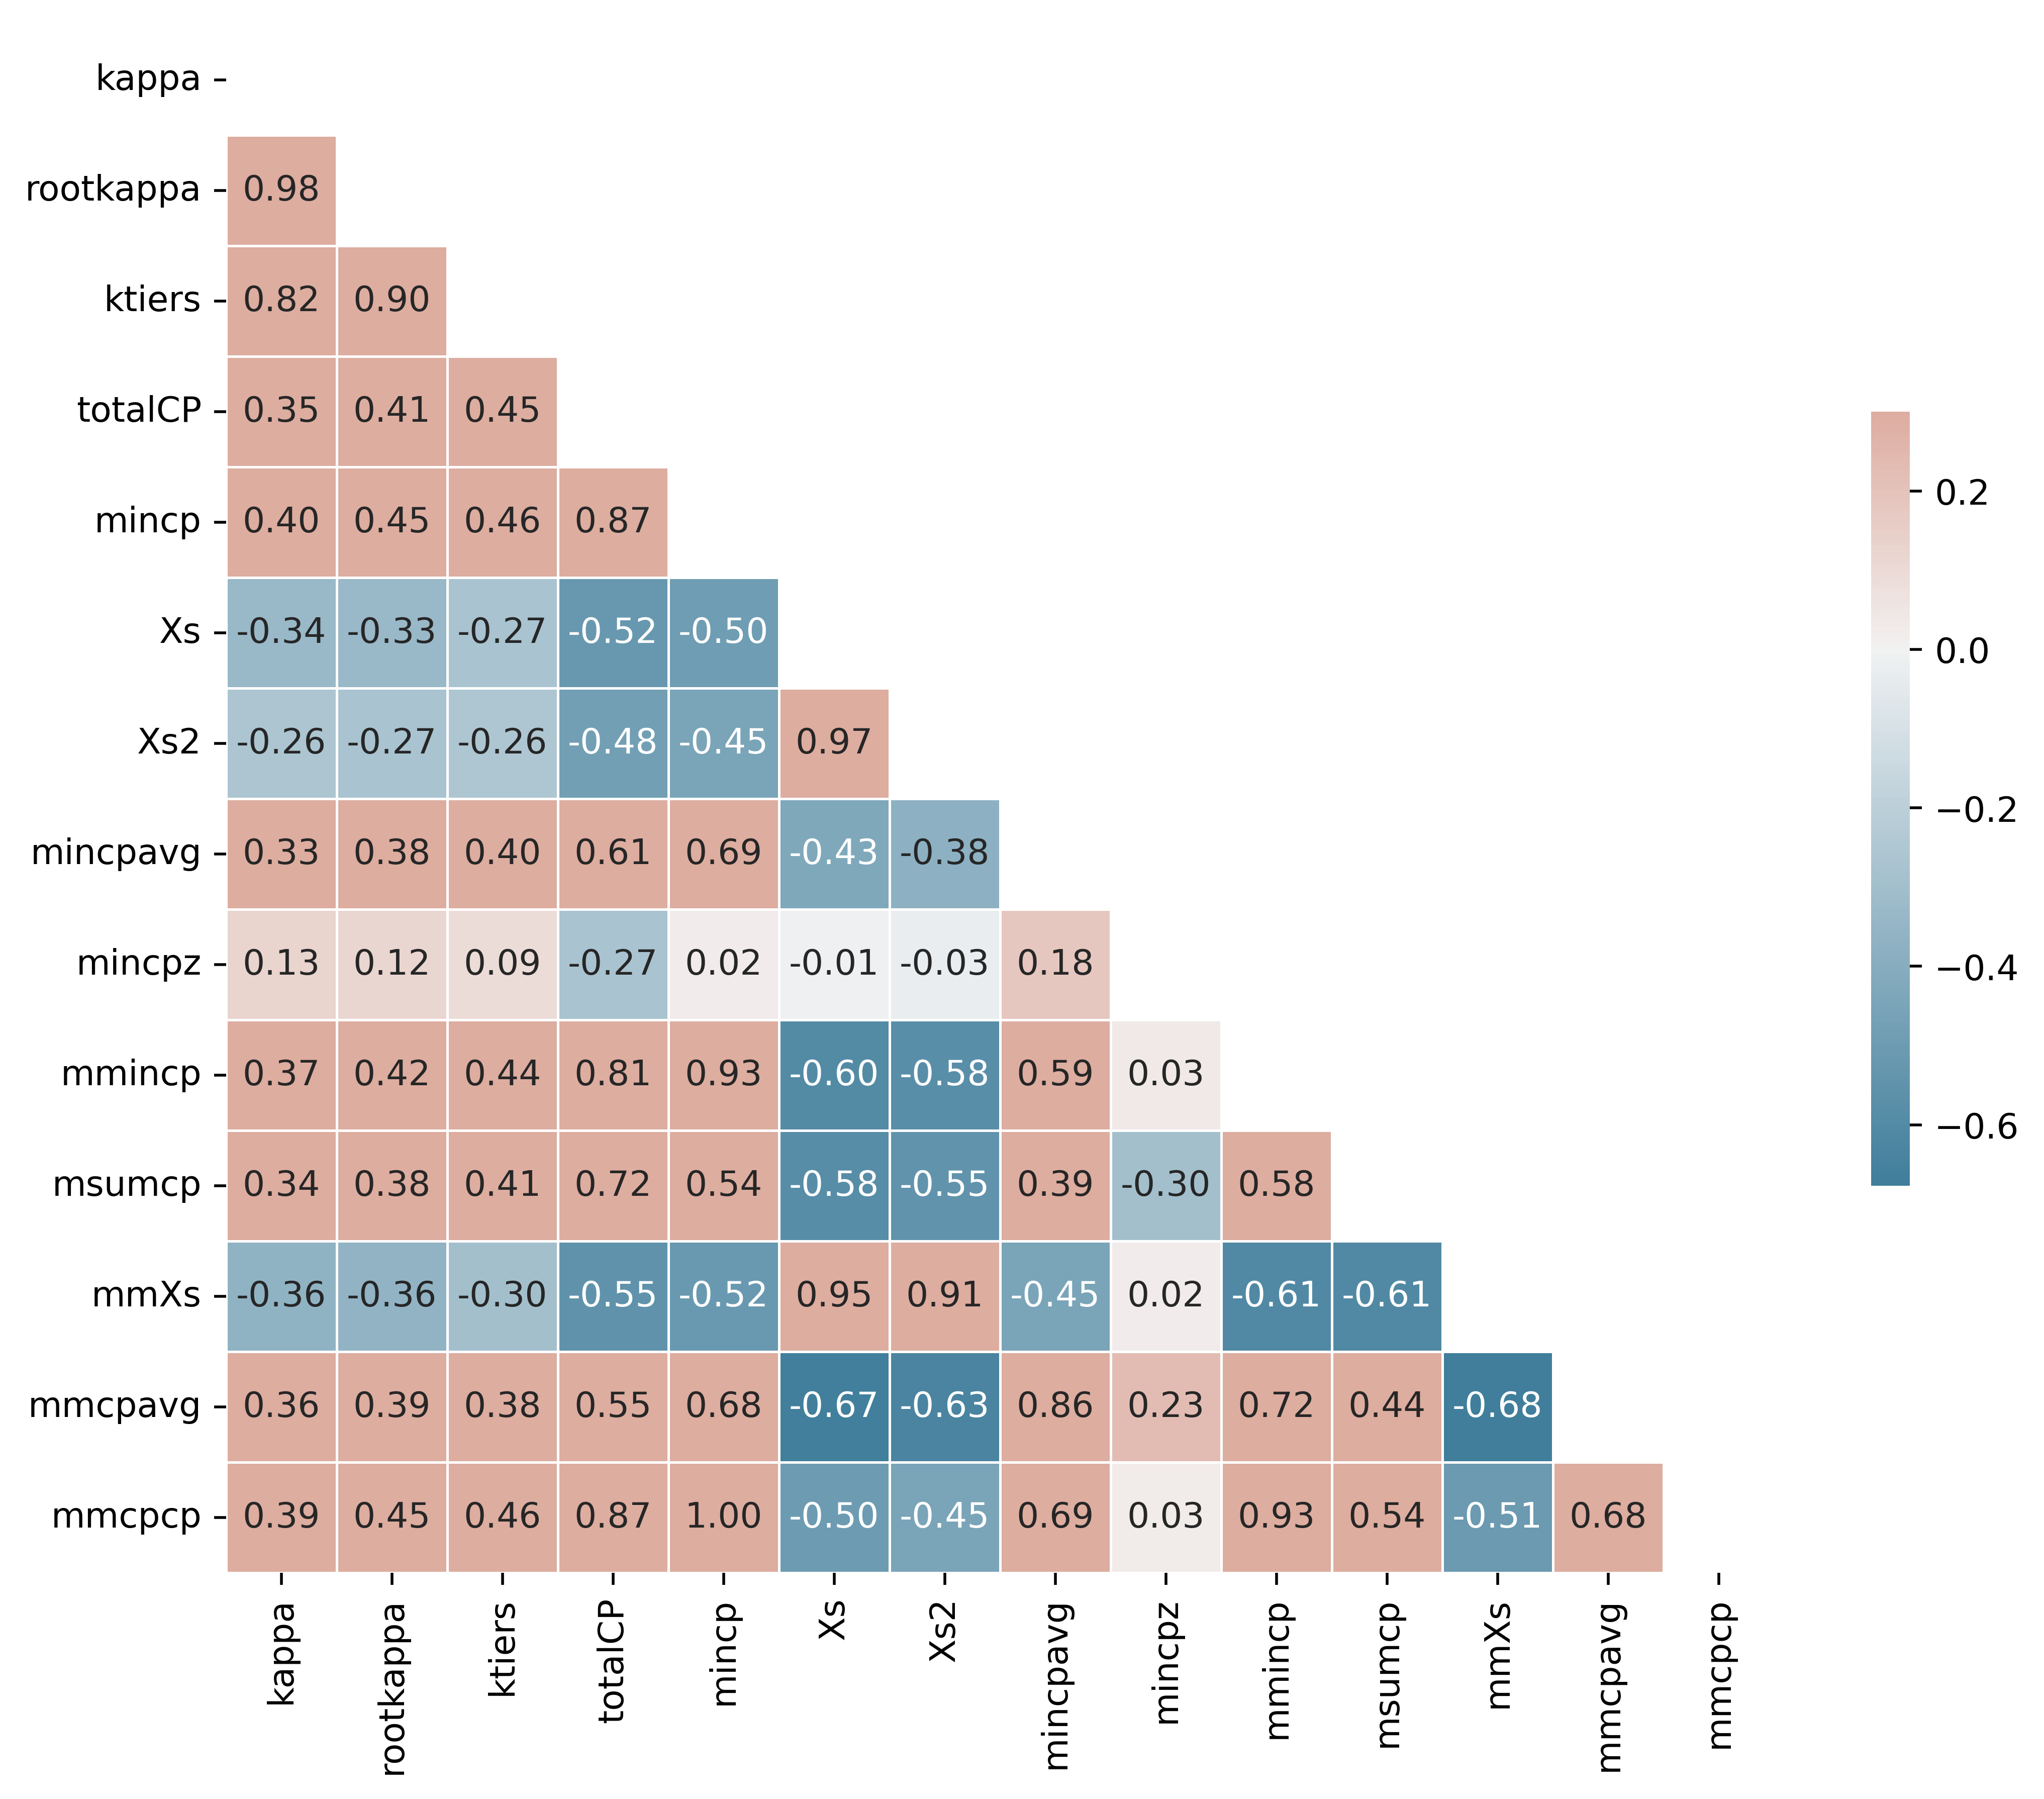

In [19]:
lowestCPnumbers=lowestCP.drop(['formulas','reduced','atom','mmatom','kclass','kunder','site','mmsite'], axis=1)
corr = lowestCPnumbers.corr(method = 'pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, fmt=".2f", cbar_kws={"shrink": .5})
plt.savefig('IMAGES/Correlation ESTM.png', bbox_inches='tight', dpi=1200)
plt.show()

In [20]:
lowestCP

kappa  rootkappa  ktiers       kclass   kunder      formulas      reduced  \
0    0.21   0.458258       0       under1  Under 1      Ag8SnSe6     Ag8SnSe6   
1    0.49   0.700000       0       under1  Under 1    Cu12Sb4S13   Cu12Sb4S13   
2    1.07   1.034408       1  undermedian   Over 1        MgAgSb       MgAgSb   
3    1.40   1.183216       1  undermedian   Over 1          SnSe         SnSe   
4    2.37   1.539480       2       under3   Over 1          TiS2         TiS2   
5    6.75   2.598076       3        over3   Over 1         VFeSb        VFeSb   
6    7.59   2.754995       3        over3   Over 1        LiCoO2       LiCoO2   
7    8.04   2.835489       3        over3   Over 1          GeTe         GeTe   
8    8.30   2.880972       3        over3   Over 1        CoGeTe       CoGeTe   
9    8.43   2.903446       3        over3   Over 1        CuFeS2       FeCuS2   
10  10.00   3.162278       3        over3   Over 1         Co9S8        Co9S8   
11  11.20   3.346640       3        over3   Over 1          CoS2         CoS2   
12  13.69   3.700000       3        over3   Over 1          CoSi         CoSi   
13   0.31   0.556776       0       under1  Under 1      Tl2GeTe3     Tl2GeTe3   
14   0.46   0.678233       0       under1  Under 1       BaBiTe3      BaBiTe3   
15   0.52   0.721110       0       under1  Under 1      Tl4SnTe3     Tl4SnTe3   
16   0.86   0.927362       0       under1  Under 1     Sb2Si2Te6      SiSbTe3   
17   0.96   0.979796       0       under1  Under 1        Bi2Te3       Bi2Te3   
18   1.62   1.272792       2       under3   Over 1      YbCd2Sb2    Yb(CdSb)2   
19   8.60   2.932576       3        over3   Over 1         YbSi2        YbSi2   
20   0.51   0.714143       0       under1  Under 1    Rb2Bi8Se13   Rb2Bi8Se13   
21   0.53   0.728011       0       under1  Under 1       AgBiSe2      AgBiSe2   
22   0.56   0.748331       0       under1  Under 1     BaTmCo4O7    BaTmCo4O7   
23   0.59   0.768115       0       under1  Under 1     BaLuCo4O7    BaLuCo4O7   
24   0.61   0.781025       0       under1  Under 1     BaDyCo4O7    BaDyCo4O7   
25   0.65   0.806226       0       under1  Under 1   CsPr2Ag3Te5  CsPr2Ag3Te5   
26   0.66   0.812404       0       under1  Under 1   CsSm2Ag3Te5  CsSm2Ag3Te5   
27   0.71   0.842615       0       under1  Under 1      TlCr5Se8     TlCr5Se8   
28   0.75   0.866025       0       under1  Under 1    Ca14MgBi11   Ca14MgBi11   
29   0.78   0.883176       0       under1  Under 1       BiCuSeO      CuBiSeO   
30   0.78   0.883176       0       under1  Under 1      Ca11Sb10     Ca11Sb10   
31   0.85   0.921954       0       under1  Under 1        As2Te3       Te3As2   
32   0.85   0.921954       0       under1  Under 1     Bi2Si2Te6      SiBiTe3   
33   0.87   0.932738       0       under1  Under 1     Ca5In2Sb6  Ca5(InSb3)2   
34   0.92   0.959166       0       under1  Under 1     Cr2Ge2Te6      CrGeTe3   
35   0.99   0.994987       0       under1  Under 1      Ca3AlSb3     Ca3AlSb3   
36   1.00   1.000000       0       under1   Over 1    Yb14MnSb11   Yb14MnSb11   
37   1.10   1.048809       1  undermedian   Over 1     Ca5Ga2Sb6  Ca5(GaSb3)2   
38   1.20   1.095445       1  undermedian   Over 1      Tl4PbTe3     Tl4Te3Pb   
39   1.25   1.118034       1  undermedian   Over 1    Sr14MgBi11   Sr14MgBi11   
40   1.34   1.157584       1  undermedian   Over 1        Mg3Sb2       Mg3Sb2   
41   1.41   1.187434       1  undermedian   Over 1      EuCd2Sb2    Eu(CdSb)2   
42   1.41   1.187434       1  undermedian   Over 1           SnS          SnS   
43   1.51   1.228821       1  undermedian   Over 1    Eu14MgBi11   Eu14MgBi11   
44   1.54   1.240967       1  undermedian   Over 1    Yb14MgBi11   Yb14MgBi11   
45   1.87   1.367479       2       under3   Over 1       Cu3SbS4      Cu3SbS4   
46   1.88   1.371131       2       under3   Over 1      BaZn2As2    Ba(ZnAs)2   
47   2.17   1.473092       2       under3   Over 1          PbTe         TePb   
48   2.33   1.526434       2       

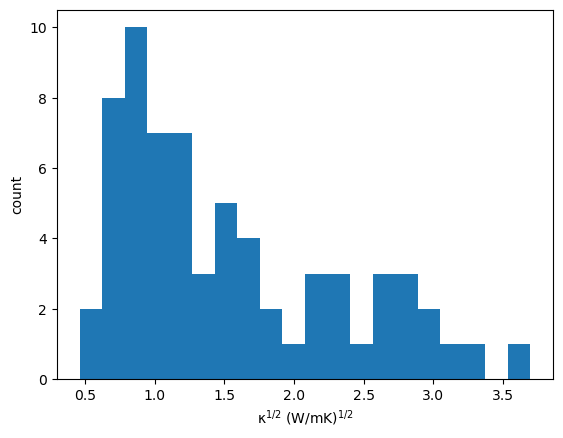

In [21]:
plt.hist(lowestCP['rootkappa'],bins=20)
plt.ylabel("count")
plt.xlabel('$\mathregular{\kappa^{1/2}}$ $\mathregular{(W/mK)^{1/2}}$')
plt.savefig('IMAGES/Thermal Conductivity Distribution (ESTM data).png', bbox_inches='tight', dpi=1200)

In [22]:
CPcolumns=[['mincp','mincpavg','totalCP'],['mmincp','mmcpavg','mmXs'],['mmcpcp','msumcp','Xs']]
CPcolumnsunits=[['$\mathregular{CP_{min}}$ (GPa)',' $\mathregular{CP_{min}/|CP|_{avg}}$','total CP (GPa)'],['$\mathregular{(CP*\chi_s)_{min}}$ (GPa)','$\mathregular{(CP*\chi_s)_{min}/|CP|_{avg}}$','$\mathregular{\chi_s}$ of $\mathregular{(CP*\chi_s)_{min}}$ site'],['CP of $\mathregular{(CP*\chi_s)_{min}}$ site (GPa)','$\mathregular{\sum(CP*\chi_s)}$ (GPa)','$\mathregular{\chi_s}$ of $\mathregular{CP_{min}}$ site']]


In [23]:
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go

# fig = make_subplots(
#     rows=5, cols=2)

# for i in range(5):
#     for j in range(2):   
#         fig.add_trace(px.scatter(lowestCP, y="rootkappa", x="Xs2", color="ktiers",title="differences between minCP and min(Xs*CP)",
#                 width=1000, height=600,hover_data=['formulas','atom','site','Xs','mmXs','mmatom']),row=i, col=j)

# fig.update_layout(height=500, width=700,
#                   title_text="Multiple Subplots with Titles")

# fig.show()

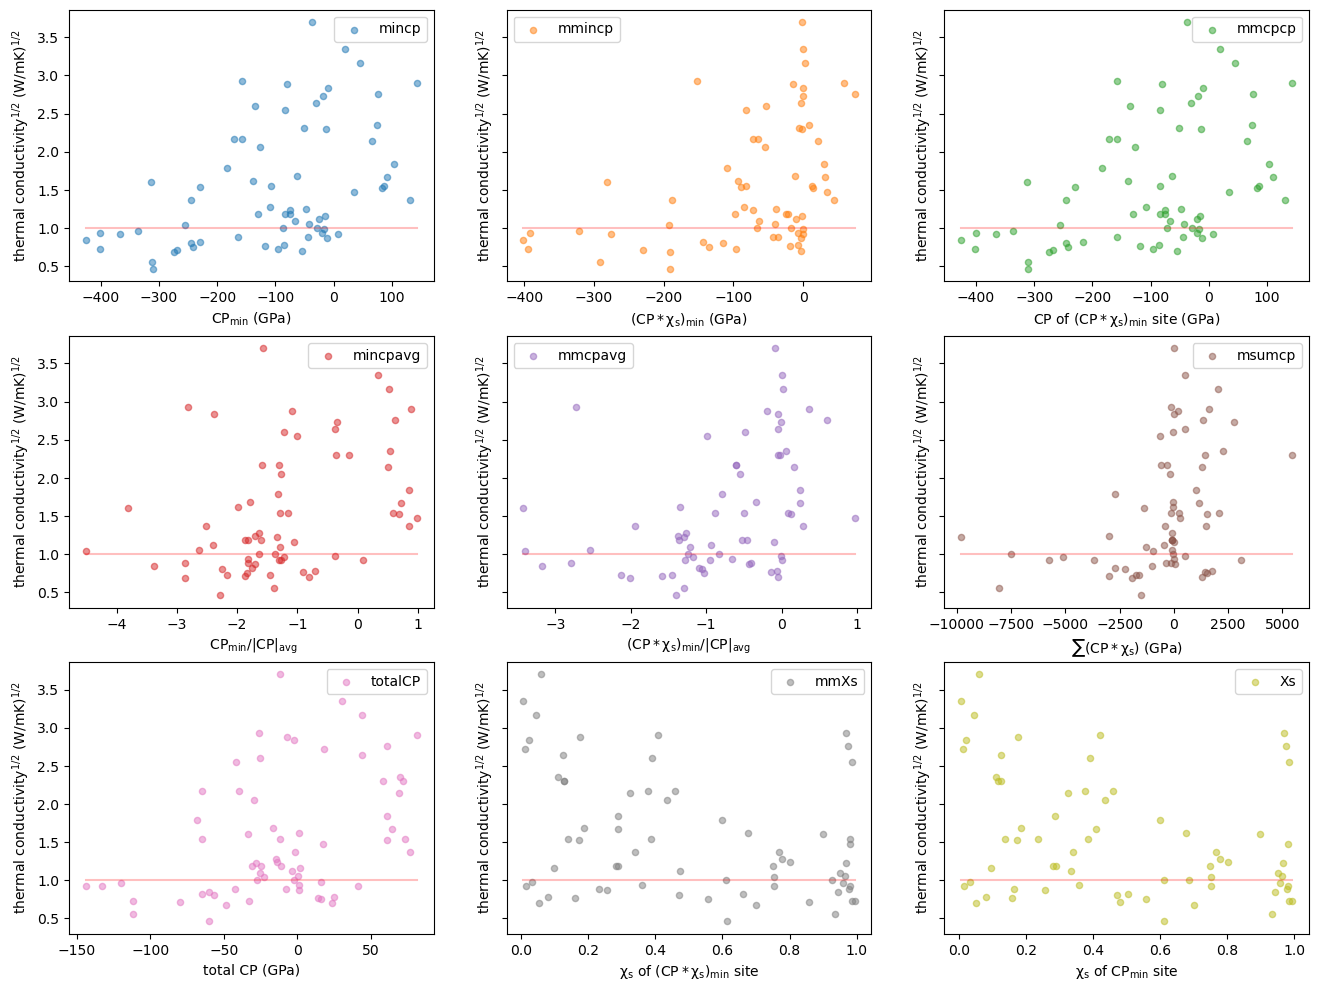

In [24]:
fig, axs = plt.subplots(3, 3,sharey=True, figsize=(16, 12))
colornumb=0
for i in range(3):
    for j in range(3):
        axs[i, j].scatter(lowestCP[CPcolumns[j][i]], lowestCP['rootkappa'],s=20,label=CPcolumns[j][i],c='C'+str(colornumb),alpha=0.5)
        axs[i, j].plot([min(lowestCP[CPcolumns[j][i]]),max(lowestCP[CPcolumns[j][i]])],[1,1],c='r',alpha=0.25)
        axs[i, j].set_xlabel(CPcolumnsunits[j][i])
        axs[i, j].legend()
        axs[i, j].set_ylabel('thermal $\mathregular{conductivity^{1/2}}$ $\mathregular{(W/mK)^{1/2}}$')
        colornumb+=1
plt.savefig('IMAGES/ESTM10Var.png', bbox_inches='tight', dpi=1500)

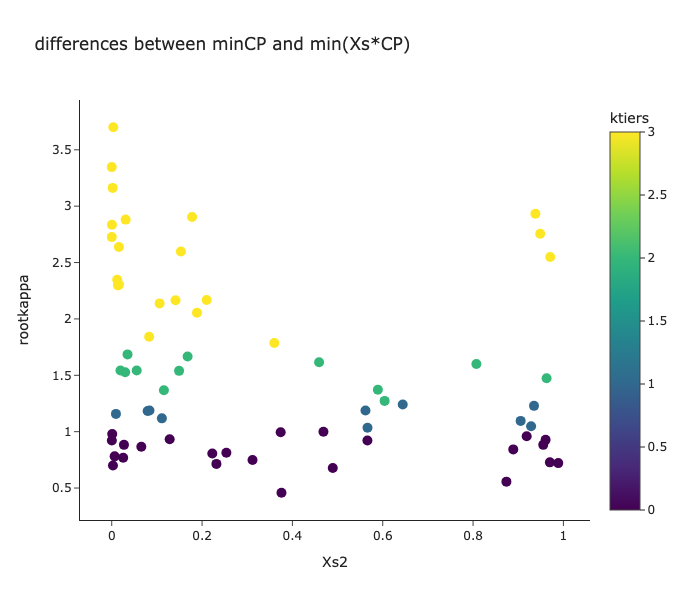

In [25]:

fig = px.scatter(lowestCP, y="rootkappa", x="Xs2", color="ktiers",title="differences between minCP and min(Xs*CP)",
                width=1000, height=600,hover_data=['formulas','atom','site','Xs','mmXs','mmatom'])
fig.update_traces(marker_size=10)
fig.show()


In [26]:
xvalues="z"
yvalues="rootkappa"
colorvalues="ktiers"
fig = px.scatter(lowestCP, y=yvalues, x=xvalues, color=colorvalues,title=f"{yvalues} by {xvalues} and {colorvalues}",
                width=1000, height=600,hover_data=['kappa','formulas','atom','site','Xs'])
fig.update_traces(marker_size=10)
fig.show()
r2_score(lowestCP[xvalues],lowestCP[yvalues])

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[26], line 4
      2 yvalues="rootkappa"
      3 colorvalues="ktiers"
----> 4 fig = px.scatter(lowestCP, y=yvalues, x=xvalues, color=colorvalues,title=f"{yvalues} by {xvalues} and {colorvalues}",
      5                 width=1000, height=600,hover_data=['kappa','formulas','atom','site','Xs'])
      6 fig.update_traces(marker_size=10)
      7 fig.show()

File ~/anaconda3/envs/matlearnthings/lib/python3.12/site-packages/plotly/express/_chart_types.py:66, in scatter(data_frame, x, y, color, symbol, size, hover_name, hover_data, custom_data, text, facet_row, facet_col, facet_col_wrap, facet_row_spacing, facet_col_spacing, error_x, error_x_minus, error_y, error_y_minus, animation_frame, animation_group, category_orders, labels, orientation, color_discrete_sequence, color_discrete_map, color_continuous_scale, range_color, color_contin

In [ ]:
fig = px.scatter(lowestCP, y="mincp", x="mmincpcp", color="ktiers",title="differences between minCP and min(Xs*CP)",
                width=1000, height=600,hover_data=['formulas','atom','site','Xs','mmXs','mmatom'])
fig.update_traces(marker_size=10)
fig.show()
r2_score(lowestCP['mincp'],lowestCP['mmincp'])**0.5

In [ ]:
fig = px.scatter(lowestCP, y="kappa", x="mmincp.5", color="kunder",title="thermal conductivity by scaled min(Xs*CP) of structure",
                width=1000, height=600,hover_data=['formulas','atom','site','Xs'],log_y=False)
fig.update_traces(marker_size=10)
fig.show()

In [ ]:
fig = px.scatter(lowestCP, y="kappa", x="CPD", color="kunder",title="thermal conductivity by min(Xs*CP) of structure",
                width=1000, height=600,hover_data=['formulas','atom','site','Xs'],log_y=False)
fig.update_traces(marker_size=10)
fig.show()

In [ ]:
plt.plot(lowestCP[],lowestCP[])

In [ ]:
fig = px.scatter(lowestCP, y="mmcpcp", x="mmXs", color="rootkappa",symbol='kunder',
                width=1000, height=600)
fig.update_traces(marker_size=15)

fig.write_image("IMAGES/ESTMMMCPCPMMXS.png")
fig.show()

In [ ]:
lowestCP.columns

In [ ]:
fig = px.scatter(lowestCP, y="kappa", x="totalCP",color="kunder",title="thermal conductivity by minCP of structure",
                width=1000, height=600,hover_data=['formulas','atom','site','Xs'])
fig.update_traces(marker_size=10)
fig.show()

In [ ]:
fig = px.scatter(lowestCP, y="kappa", x="totalCP", color="kunder",title="thermal conductivity by total CP of structure",
                width=1000, height=600,hover_data=['formulas','atom','site','Xs'])
fig.update_traces(marker_size=10)
fig.show()

In [ ]:
fig = px.scatter(lowestCP, y="mincp", x="Xs", color="rootkappa",title="thermal conductivity by s character squared of lowest CP atom",
                width=1000, height=600,hover_data=['formulas','atom','site','Xs'])
fig.update_traces(marker_size=10)
fig.show()

In [ ]:
fig = px.scatter(lowestCP, y="mmXs", x="mmcpcp", color="kclass",title="thermal conductivity by s character and CP of lowest CP*s atom",
                width=1000, height=600,hover_data=['formulas','atom','site','Xs'])
fig.update_traces(marker_size=10)
fig.show()

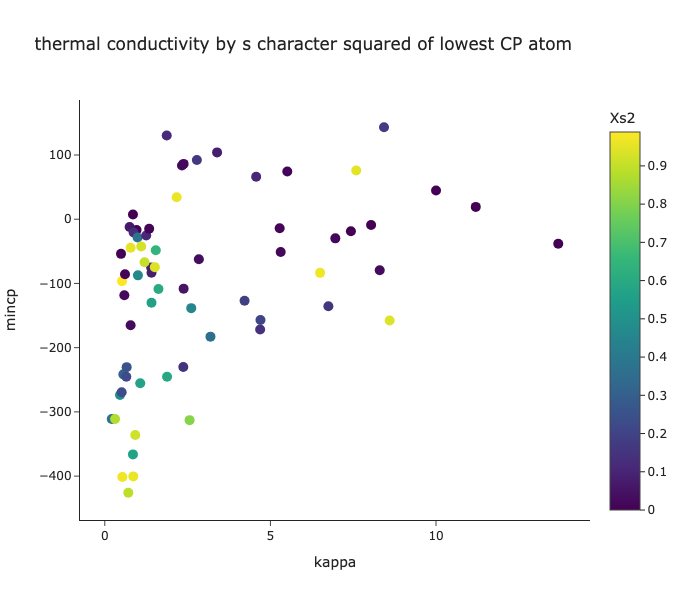

In [27]:
fig = px.scatter(lowestCP, y="mincp", x="kappa", color="Xs2",title="thermal conductivity by s character squared of lowest CP atom",
                width=1000, height=600,hover_data=['formulas','atom','site','Xs'])
fig.update_traces(marker_size=10)
fig.show()

In [28]:
allformula=[]
allCP=[]
allisCPmin=[]
allsite=[]
allatom=[]
allXs=[]
alltherm=[]


for i in range(len(formulas)):
    struct=mlcpdata[forms[i]]
    minimumindex=struct['CP'].index(min(struct['CP']))
    for n in range(len(struct['sites'])):
        allformula.append(struct['name'])
        allCP.append(struct['CP'][n])
        if n==minimumindex:
            allisCPmin.append(1)
        else:
            allisCPmin.append(0)
        allsite.append(n)
        allatom.append(struct['sites'][n])
        qps=[0,0,0,0,0]
        for j in range(5):
            for k in range(j**2,(j+1)**2): #an increasing odd number for each, as in the harmonics
                qps[j] += struct['coeffs'][n][k]**2 #combining each level squared, for l=0 to 4 for each atom
        try:
            allXs.append(qps[0]/sum(qps))
        except:
            allXs.append(0)
        alltherm.append(database.iloc[i].loc['thermal_conductivity(W/mK)'])

In [29]:
allatoms = pd.DataFrame()

In [30]:
allatoms['formulas']=allformula
allatoms['cp']=allCP
allatoms['ismin']=allisCPmin
allatoms['site']=allsite
allatoms['atom']=allatom
allatoms['Xs']=allXs
allatoms['kappa']=alltherm
allatoms['Xs2']=allatoms['Xs']**2
allatoms['mult']=allatoms['Xs']*allatoms['cp']
allatoms['rootkappa']=allatoms['kappa']**0.5

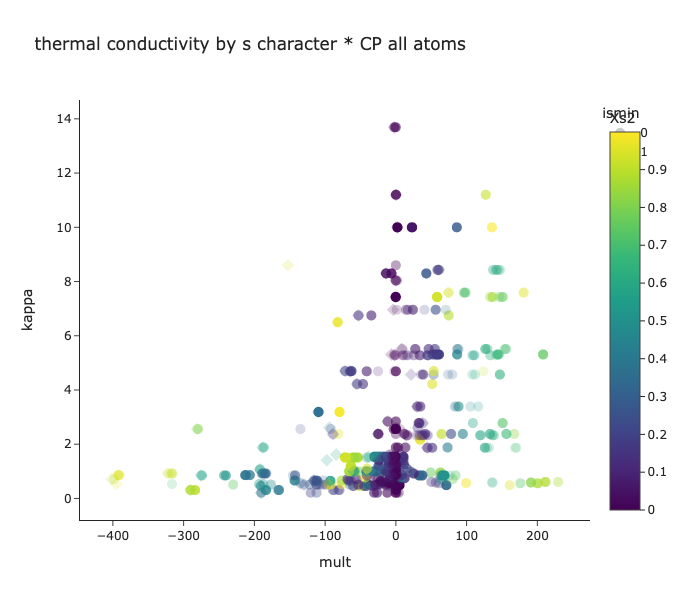

In [31]:
fig = px.scatter(allatoms, x="mult", y="kappa", color="Xs2",symbol="ismin",title="thermal conductivity by s character * CP all atoms",
                width=1000, height=600,hover_data=['formulas','atom','site','Xs'],opacity=0.2)
fig.update_traces(marker_size=10)
fig.show()

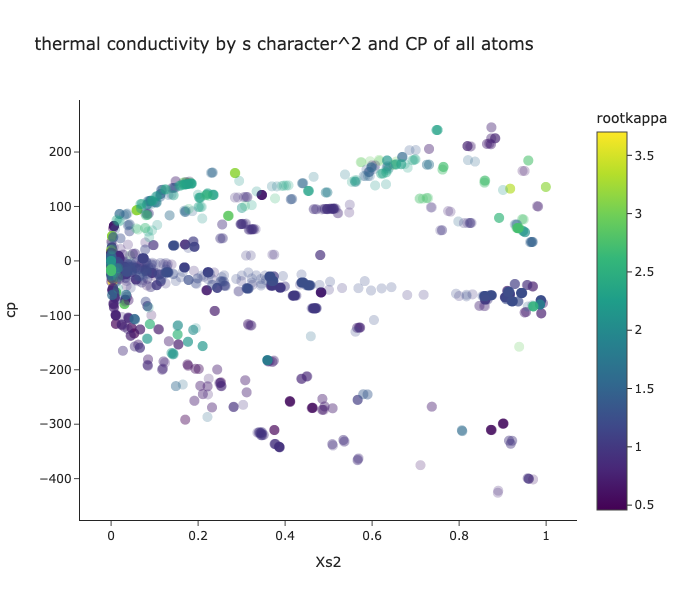

In [32]:
fig = px.scatter(allatoms, y="cp", x="Xs2", color="rootkappa",title="thermal conductivity by s character^2 and CP of all atoms",
                width=1000, height=600,hover_data=['formulas','atom','site','Xs'],opacity=0.25)
fig.update_traces(marker_size=10)
fig.show()

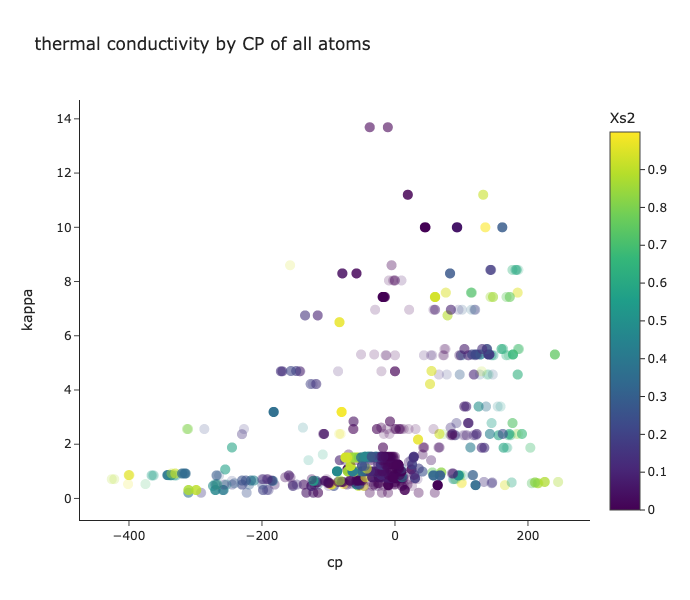

In [33]:
fig = px.scatter(allatoms, x="cp", y="kappa", color="Xs2",title="thermal conductivity by CP of all atoms",
                width=1000, height=600,hover_data=['formulas','atom','site','Xs'],opacity=0.2)
fig.update_traces(marker_size=10)
fig.show()

In [34]:
'''
qps=[]
for i in range(30): #for each atom
    qps.append([0,0,0,0,0])
    for j in range(5):
        for k in range(j**2,(j+1)**2): #an increasing odd number for each, as in the harmonics
            qps[i][j] += examle[i][k]**2 #combining each level squared, for l=0 to 4 for each atom
            
for i in range(len(qps)): #for each atom
    qp_lmax.append([0,0,0])
    qps_total.append([])
    for j in range(3):
        for k in range(j+3):
            qp_lmax[i][j] += qps[i][k] #summing the combined coeff values, starting with first 3, up to all.
    for j in range(3):
        try: 
            qps_total[i].append(qps[i][2]/qp_lmax[i][j]) #how much the l=2 level comb coeff (d basically) is of the total added coeffs, three here too, how quadrupolar it is
        except:
            qps_total[i].append(0)
    for j in range(5):
        try:
            qps_total[i].append(qps[i][j]/qp_lmax[i][2]) #new, contribution of each
        except:
            qps_total[i].append(0)
    try:
        qps_total[i].append(coeffs[i][4]**2/qp_lmax[i][2]) #new, dz^2 contribution
    except:
        qps_total[i].append(0)
'''

'\nqps=[]\nfor i in range(30): #for each atom\n    qps.append([0,0,0,0,0])\n    for j in range(5):\n        for k in range(j**2,(j+1)**2): #an increasing odd number for each, as in the harmonics\n            qps[i][j] += examle[i][k]**2 #combining each level squared, for l=0 to 4 for each atom\n            \nfor i in range(len(qps)): #for each atom\n    qp_lmax.append([0,0,0])\n    qps_total.append([])\n    for j in range(3):\n        for k in range(j+3):\n            qp_lmax[i][j] += qps[i][k] #summing the combined coeff values, starting with first 3, up to all.\n    for j in range(3):\n        try: \n            qps_total[i].append(qps[i][2]/qp_lmax[i][j]) #how much the l=2 level comb coeff (d basically) is of the total added coeffs, three here too, how quadrupolar it is\n        except:\n            qps_total[i].append(0)\n    for j in range(5):\n        try:\n            qps_total[i].append(qps[i][j]/qp_lmax[i][2]) #new, contribution of each\n        except:\n            qps_total[

for prediction:
https://matsci.org/t/how-do-you-access-the-cif-data-in-the-new-api/44850
https://matsci.org/t/thermoelectric-data/3618/3

In [35]:
compelememts=['avg_Composition_Ag', 'avg_Composition_Al', 'avg_Composition_Ar',
       'avg_Composition_As', 'avg_Composition_Au', 'avg_Composition_B',
       'avg_Composition_Ba', 'avg_Composition_Be', 'avg_Composition_Bi',
       'avg_Composition_Br', 'avg_Composition_C', 'avg_Composition_Ca',
       'avg_Composition_Cd', 'avg_Composition_Ce', 'avg_Composition_Cl',
       'avg_Composition_Co', 'avg_Composition_Cr', 'avg_Composition_Cs',
       'avg_Composition_Cu', 'avg_Composition_Dy', 'avg_Composition_Er',
       'avg_Composition_Eu', 'avg_Composition_F', 'avg_Composition_Fe',
       'avg_Composition_Ga', 'avg_Composition_Gd', 'avg_Composition_Ge',
       'avg_Composition_H', 'avg_Composition_He', 'avg_Composition_Hf',
       'avg_Composition_Hg', 'avg_Composition_Ho', 'avg_Composition_I',
       'avg_Composition_In', 'avg_Composition_Ir', 'avg_Composition_K',
       'avg_Composition_Kr', 'avg_Composition_La', 'avg_Composition_Li',
       'avg_Composition_Lu', 'avg_Composition_Mg', 'avg_Composition_Mn',
       'avg_Composition_Mo', 'avg_Composition_N', 'avg_Composition_Na',
       'avg_Composition_Nb', 'avg_Composition_Nd', 'avg_Composition_Ne',
       'avg_Composition_Ni', 'avg_Composition_O', 'avg_Composition_Os',
       'avg_Composition_P', 'avg_Composition_Pb', 'avg_Composition_Pd',
       'avg_Composition_Pm', 'avg_Composition_Pr', 'avg_Composition_Pt',
       'avg_Composition_Rb', 'avg_Composition_Re', 'avg_Composition_Rh',
       'avg_Composition_Ru', 'avg_Composition_S', 'avg_Composition_Sb',
       'avg_Composition_Sc', 'avg_Composition_Se', 'avg_Composition_Si',
       'avg_Composition_Sm', 'avg_Composition_Sn', 'avg_Composition_Sr',
       'avg_Composition_Ta', 'avg_Composition_Tb', 'avg_Composition_Tc',
       'avg_Composition_Te', 'avg_Composition_Th', 'avg_Composition_Ti',
       'avg_Composition_Tl', 'avg_Composition_Tm', 'avg_Composition_U',
       'avg_Composition_V', 'avg_Composition_W', 'avg_Composition_Xe',
       'avg_Composition_Y', 'avg_Composition_Yb', 'avg_Composition_Zn']

In [36]:
compdict={}

for i in formulas:
    compo=comp.Composition(i)
    compo.get_atomic_fraction(comp.Element("Se"))
    



In [ ]:
formulas

In [ ]:
with MPRester("HpdL6McmVquqkGlH50Yw5gP0BUTUNyYD") as mpr:
    Fedata=mpr.materials.search(material_ids=["mp-568661"], fields=["structure","composition"])

In [ ]:
Fedata[0].structure

In [ ]:

client = Client()
dir(client) # show available resources

In [ ]:
# client = Client(apikey="HpdL6McmVquqkGlH50Yw5gP0BUTUNyYD", project="carrier_transport")
# client.available_query_params()  # print list of available query parameters
# query = {"formula__contains": "Au", "data__PF__p__value__lt": 10}
# fields = ["identifier", "formula", "data.metal", "data.S.n.value"]
# data = client.query_contributions(
#     query=query, fields=fields, sort="-data.S.n.value", paginate=True
# )

In [ ]:
fulldata=client.download_contributions()

In [ ]:
fulldata[34023]['identifier']

In [ ]:
#CdIn2Se4=mlcpquicker.mlcp(Fedata[0].structure,'CdIn2Se4')

In [37]:
ThermFeatures=ref2.write_features_ratio(database,label_col = 'Formula')

100%|██████████████████████████████████████████| 67/67 [00:00<00:00, 221.01it/s]

Data Shape: (67, 217)


In [38]:
ThermData=ThermFeatures.join(database.reset_index(drop=True))

ThermData=ThermData.drop(['Xs'], axis=1)
ThermData2=ThermData.join(lowestCP.reset_index(drop=True))

In [39]:
ThermData2['lowthermal']=[1 if a<1 else 0 for a in ThermData2['thermal_conductivity(W/mK)']]

In [40]:
therm_train,y_train,therm_test,y_test=ref.split(ThermData2,ThermData2.loc[:,'lowthermal'],split_fraction=0.7)

Training data size: 47
Test data size: 20


In [41]:
Comp=np.r_[0:217]
CPandComp=np.r_[0:217,239:241,243:249,251:254]
CPonly=np.r_[239:241,243:249,251:254]

In [42]:
X_train=therm_train.iloc[:,Comp]
X_trainCP=therm_train.iloc[:,CPandComp]
X_test=therm_test.iloc[:,Comp]
X_testCP=therm_test.iloc[:,CPandComp]
X_trainCPonly=therm_train.iloc[:,CPonly]
X_testCPonly=therm_test.iloc[:,CPonly]

In [43]:
kpred={}
kpred['train']=X_train
kpred['trainCP']=X_trainCP
kpred['trainCPO']=X_trainCPonly
kpred['test']=X_test
kpred['testCP']=X_testCP
kpred['testCPO']=X_testCPonly
kpred['ytrain']=y_train
kpred['ytest']=y_test

In [197]:
for j in ['','CP','CPO']:
    kpred['rfcmodel'+j]=RandomForestClassifier(max_features=0.6).fit(kpred['train'+j],kpred['ytrain'])
    kpred['dtcmodel'+j]=DecisionTreeClassifier().fit(kpred['train'+j],kpred['ytrain'])
    kpred['hgbcmodel'+j]=HistGradientBoostingClassifier().fit(kpred['train'+j],kpred['ytrain'])
    kpred['gbcmodel'+j]=GradientBoostingClassifier(max_features=0.6).fit(kpred['train'+j],kpred['ytrain'])

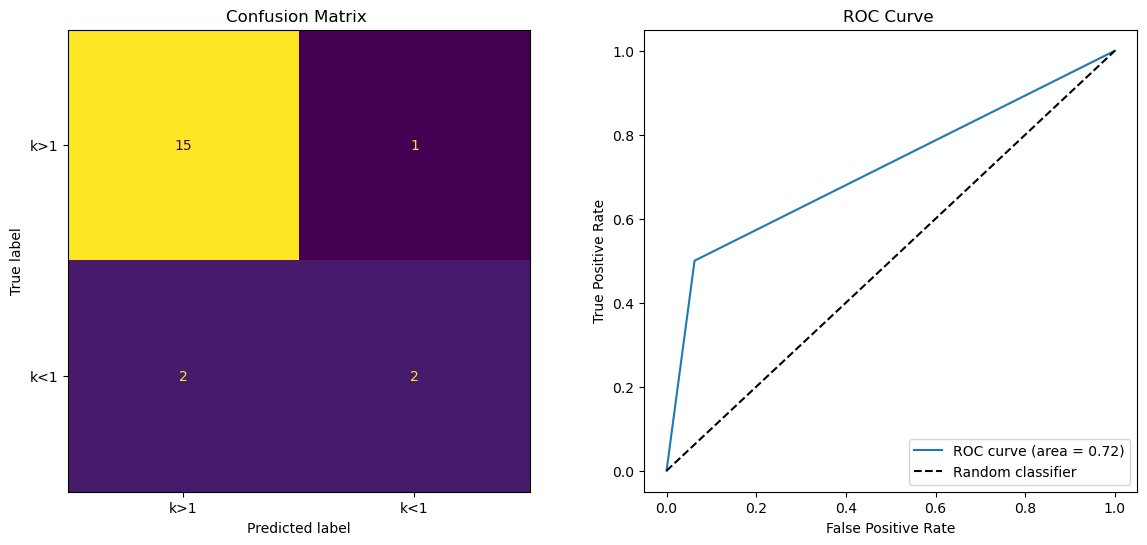

Accuracy:  0.85
Precision:  0.667
Recall:  0.5


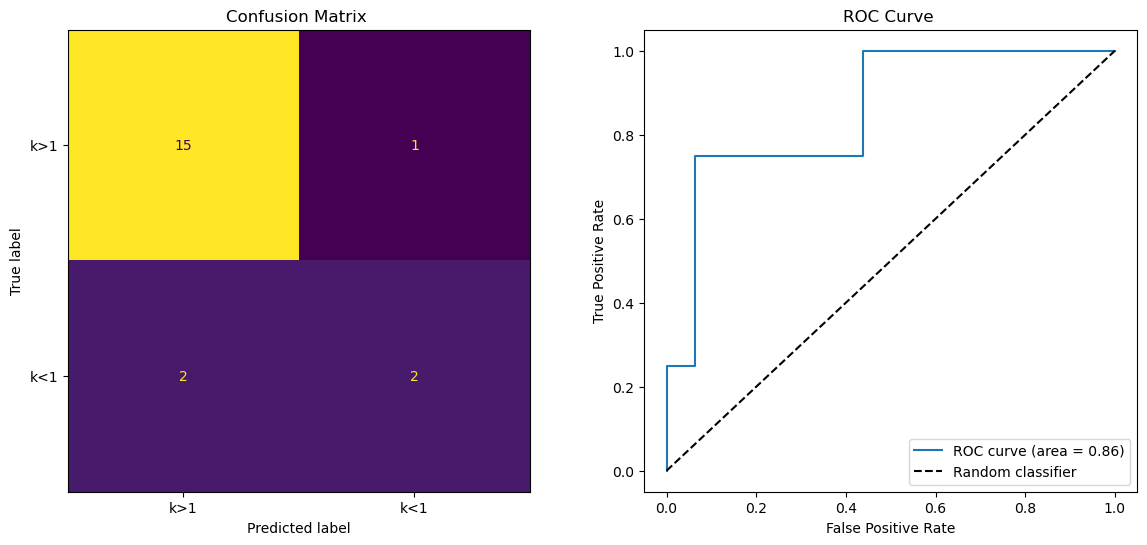

Accuracy:  0.85
Precision:  0.667
Recall:  0.5


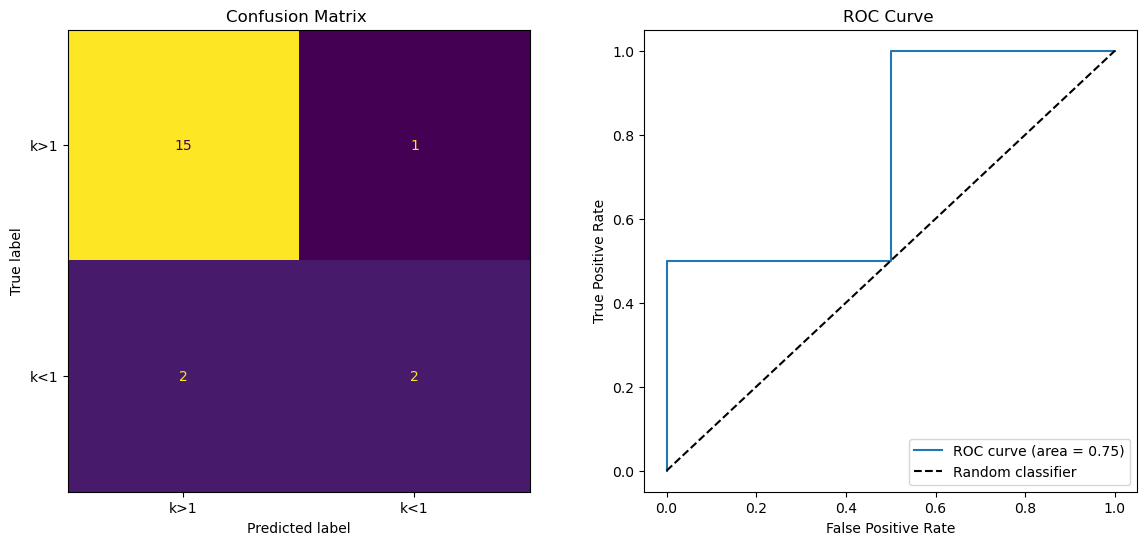

Accuracy:  0.85
Precision:  0.667
Recall:  0.5


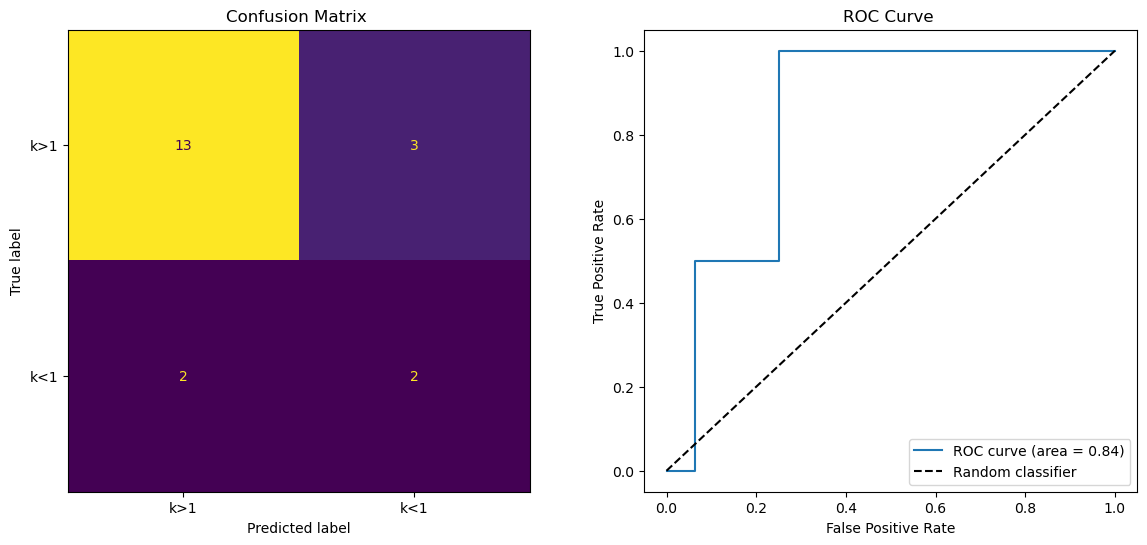

Accuracy:  0.75
Precision:  0.4
Recall:  0.5


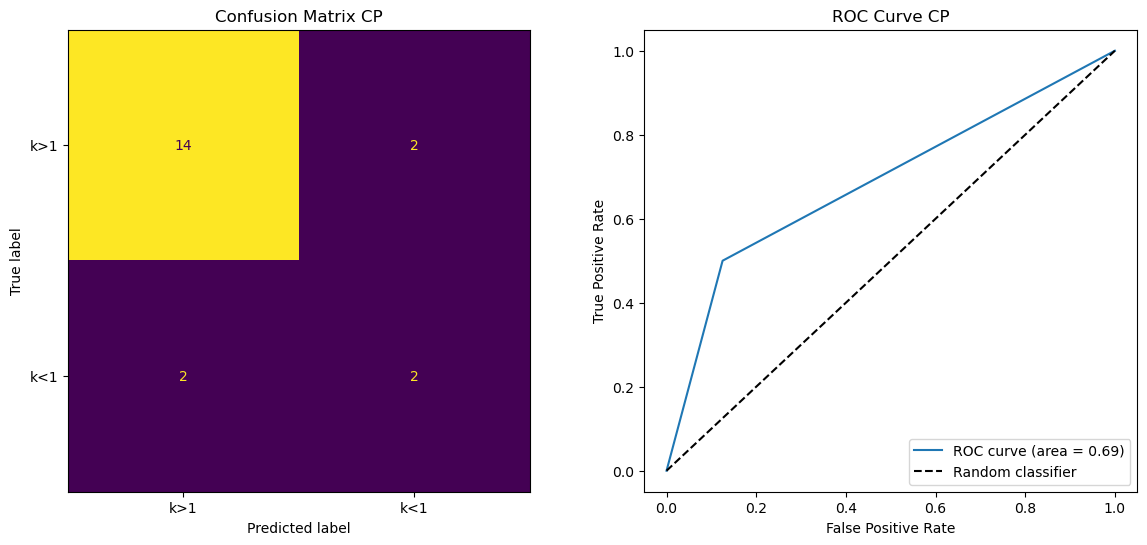

Accuracy:  0.8
Precision:  0.5
Recall:  0.5


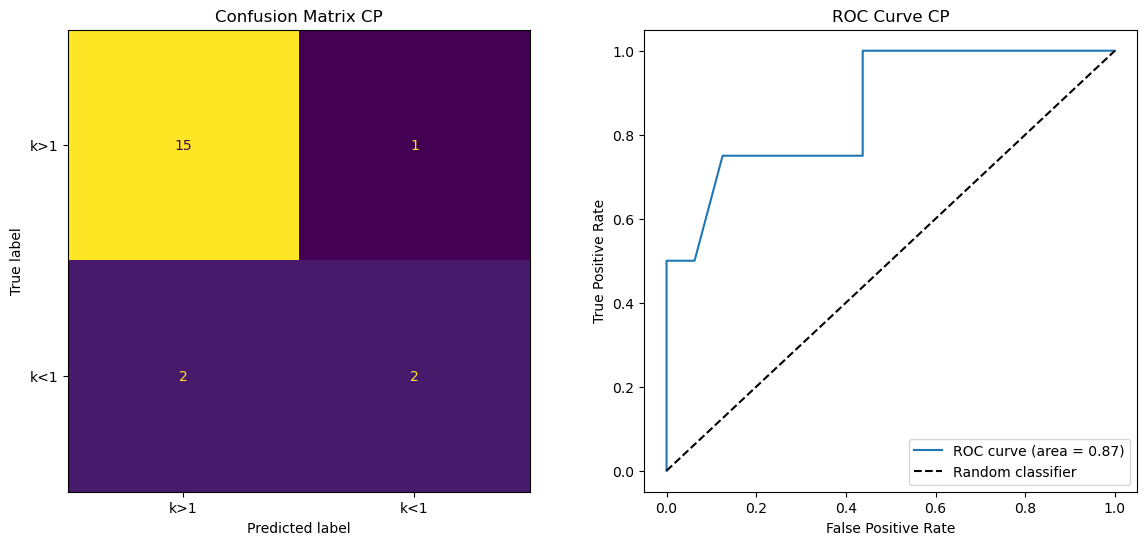

Accuracy:  0.85
Precision:  0.667
Recall:  0.5


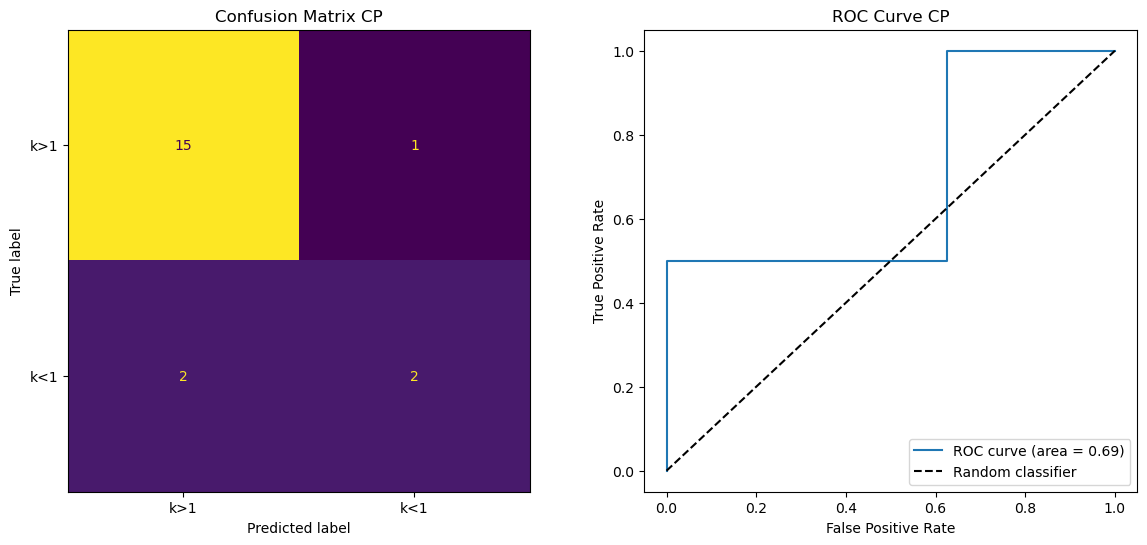

Accuracy:  0.85
Precision:  0.667
Recall:  0.5


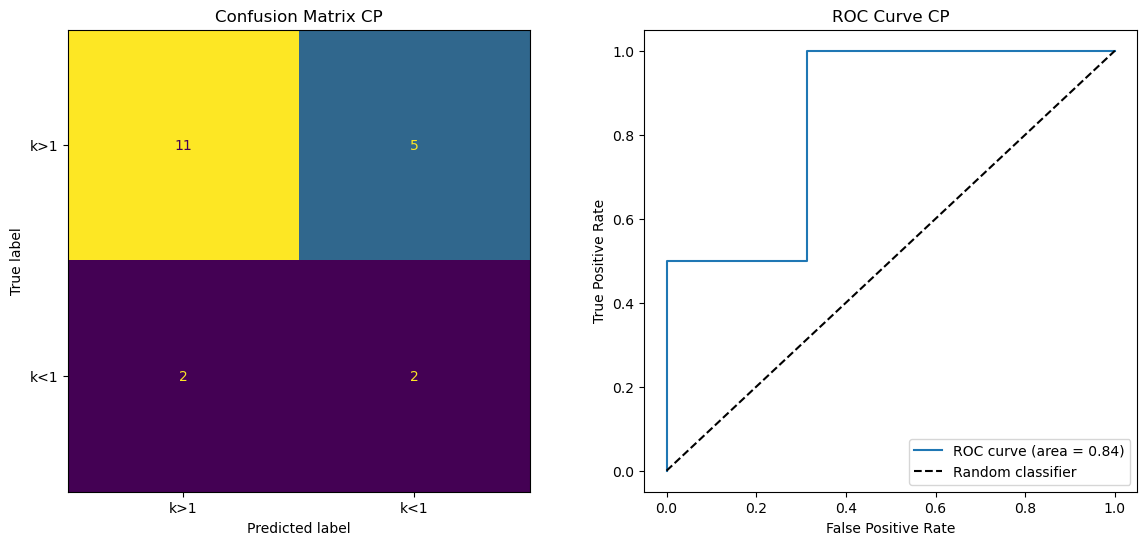

Accuracy:  0.65
Precision:  0.286
Recall:  0.5


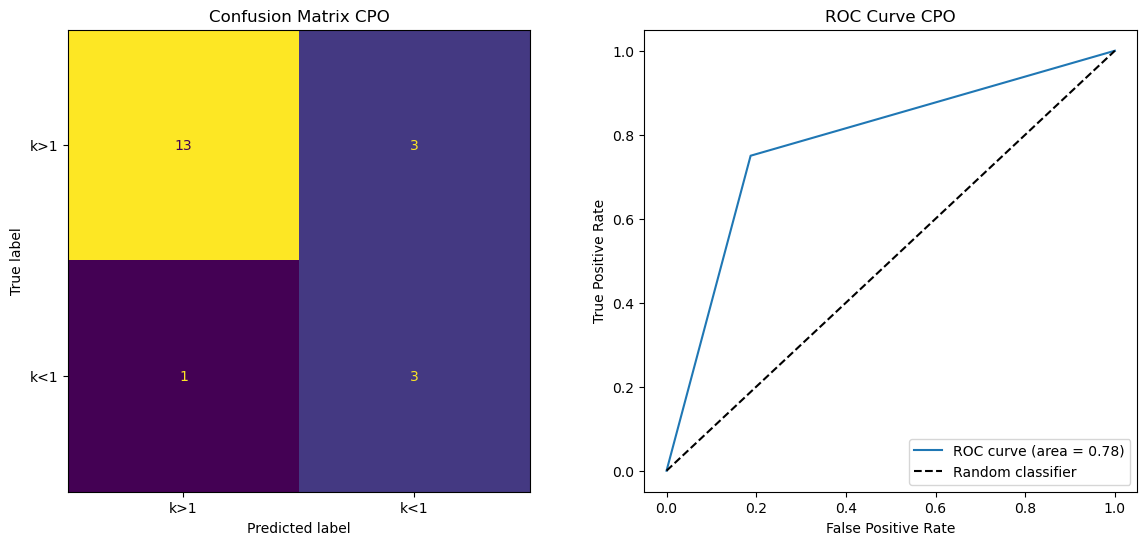

Accuracy:  0.8
Precision:  0.5
Recall:  0.75


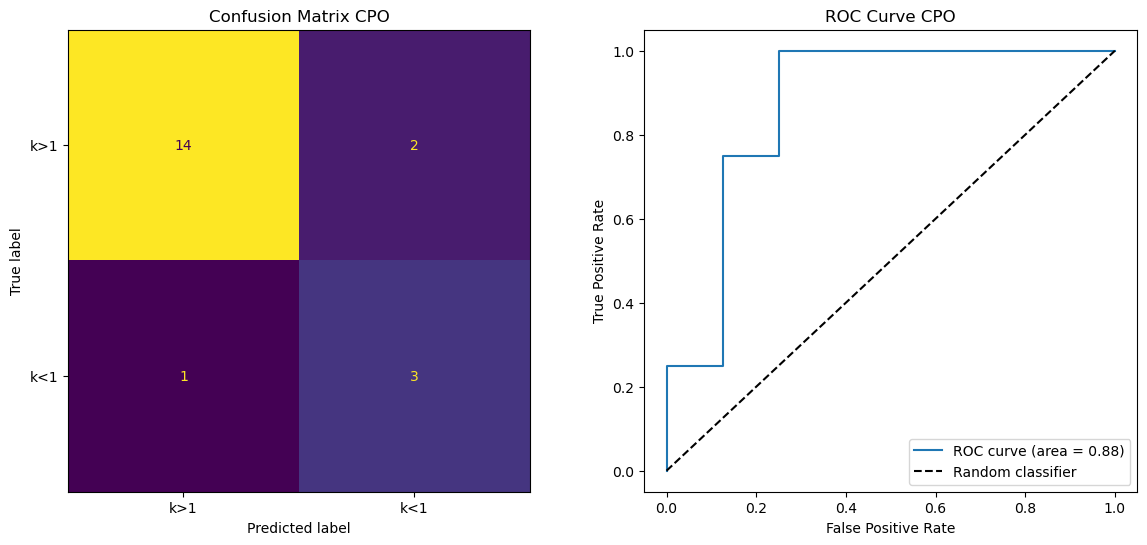

Accuracy:  0.85
Precision:  0.6
Recall:  0.75


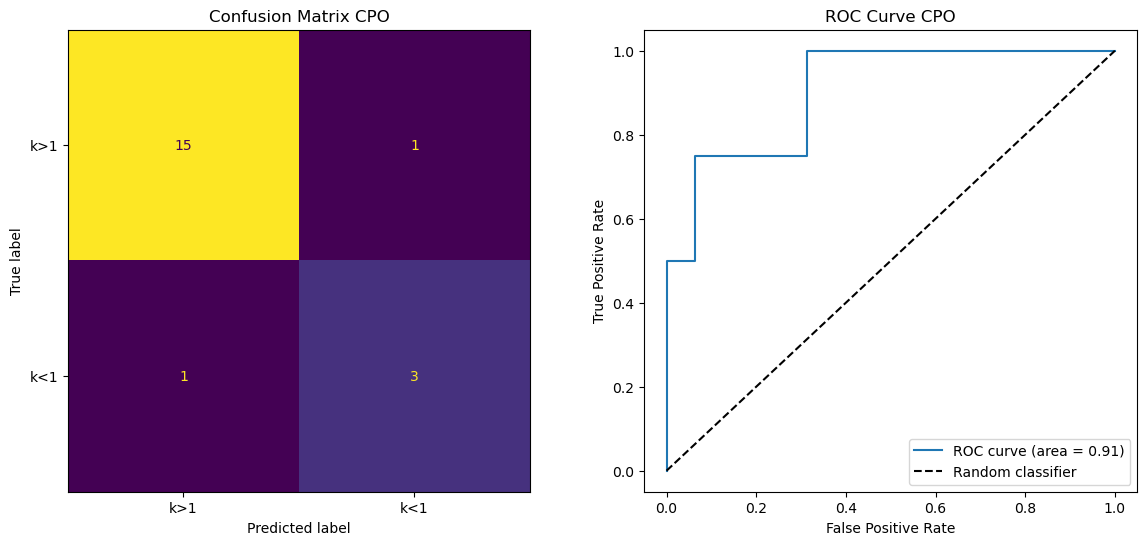

Accuracy:  0.9
Precision:  0.75
Recall:  0.75


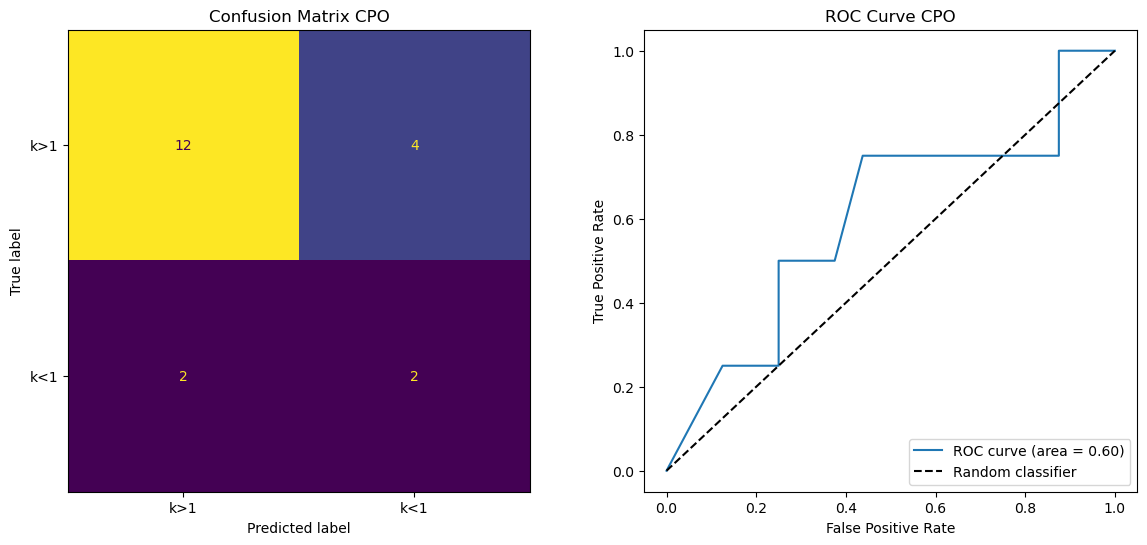

Accuracy:  0.7
Precision:  0.333
Recall:  0.5


In [200]:
threshold=1
for j in ['','CP','CPO']:
    gorup=j
    ref.rocconfusion(kpred['dtcmodel'+j],kpred['test'+j],kpred['ytest'],[f"k>{threshold}", f"k<{threshold}"],title=gorup)
    ref.rocconfusion(kpred['rfcmodel'+j],kpred['test'+j],kpred['ytest'],[f"k>{threshold}", f"k<{threshold}"],title=gorup)
    ref.rocconfusion(kpred['gbcmodel'+j],kpred['test'+j],kpred['ytest'],[f"k>{threshold}", f"k<{threshold}"],title=gorup)
    ref.rocconfusion(kpred['hgbcmodel'+j],kpred['test'+j],kpred['ytest'],[f"k>{threshold}", f"k<{threshold}"],title=gorup)

In [164]:
#DecisionTreeClassifier
#RandomForestClassifier
#HistGradientBoostingClassifier
#GradientBoostingClassifier

modelthermCP=RandomForestClassifier().fit(X_trainCP,y_train)
modeltherm=RandomForestClassifier().fit(X_train,y_train)
modelthermCPonly=RandomForestClassifier().fit(X_trainCPonly,y_train)

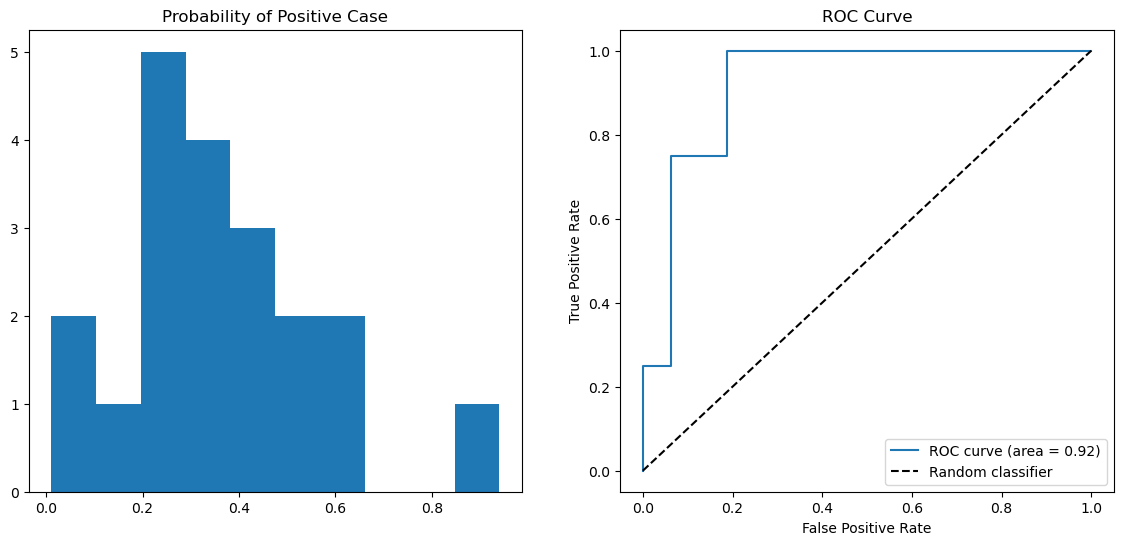

In [165]:
ref.roc(modelthermCPonly,X_testCPonly,y_test)

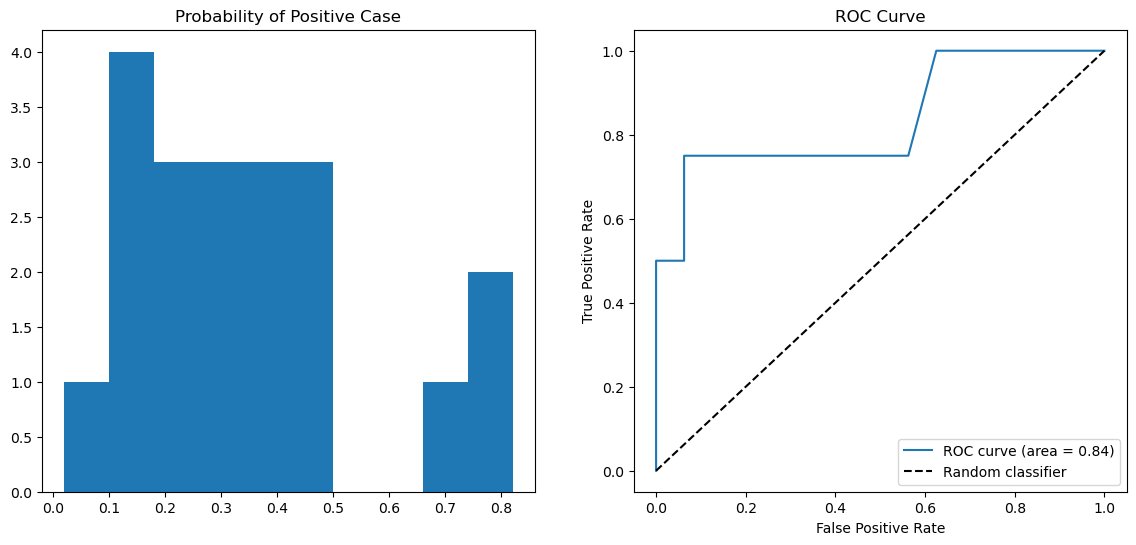

In [166]:
ref.roc(modelthermCP,X_testCP,y_test)

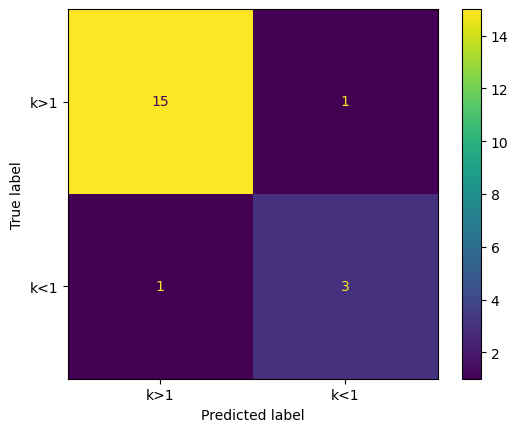

Accuracy:  0.9
Precision:  0.75
Recall:  0.75


In [167]:
ref.test_rf_modelbinary_boost(modelthermCPonly,X_testCPonly,y_test,["k>1", "k<1"])

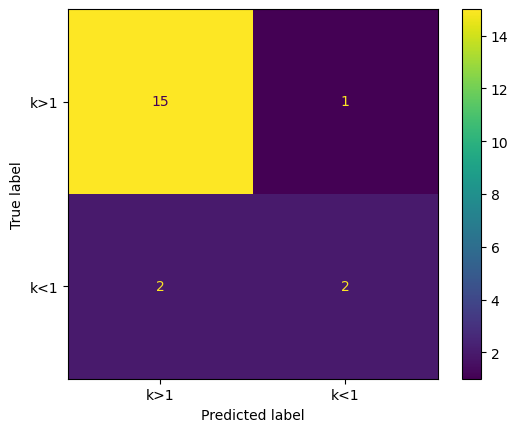

Accuracy:  0.85
Precision:  0.667
Recall:  0.5


In [168]:
ref.test_rf_modelbinary_boost(modelthermCP,X_testCP,y_test,["k>1", "k<1"])

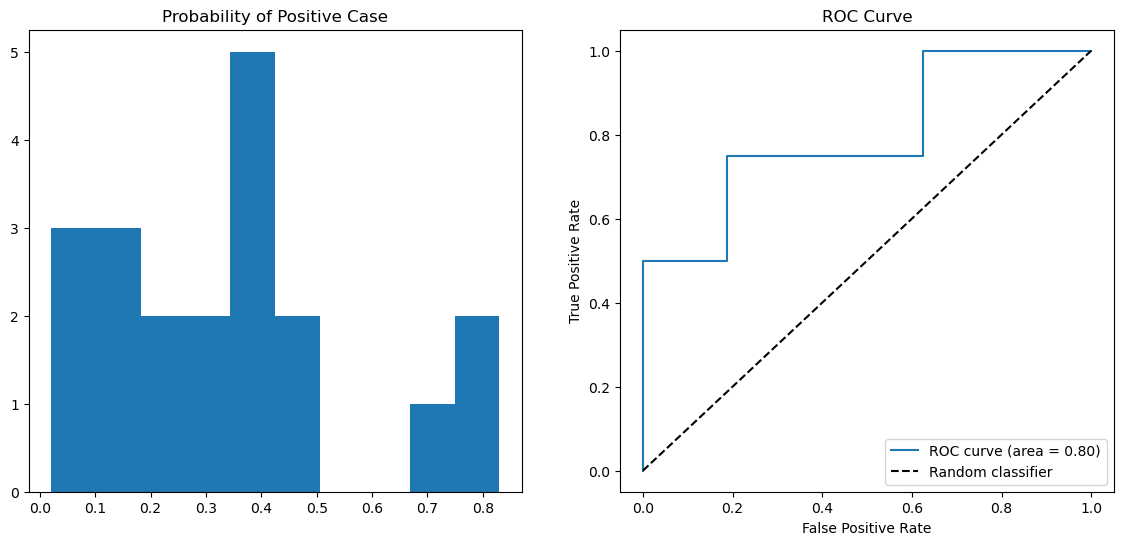

In [169]:
ref.roc(modeltherm,X_test,y_test)

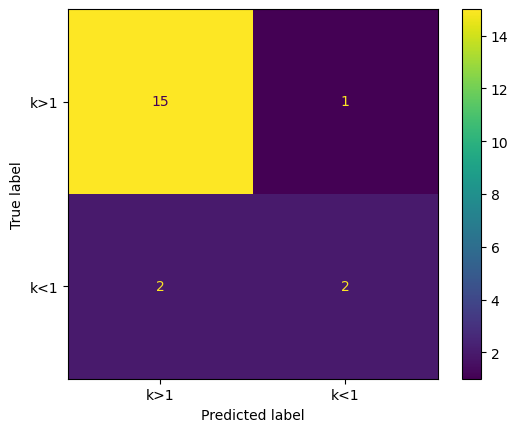

Accuracy:  0.85
Precision:  0.667
Recall:  0.5


In [170]:
ref.test_rf_modelbinary_boost(modeltherm,X_test,y_test,["k>1", "k<1"])

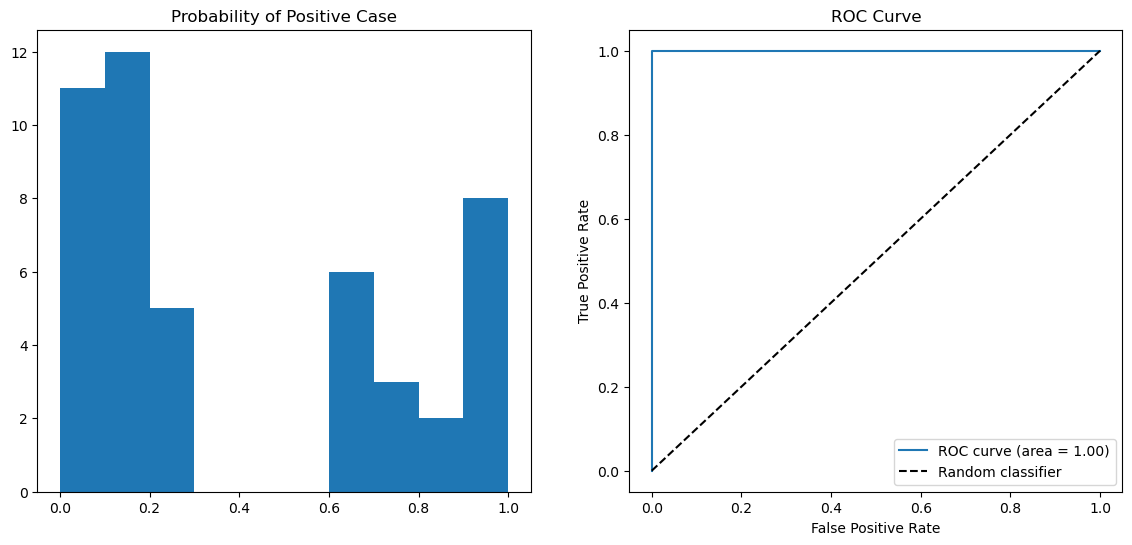

In [171]:
ref.roc(modelthermCPonly,X_trainCPonly,y_train)

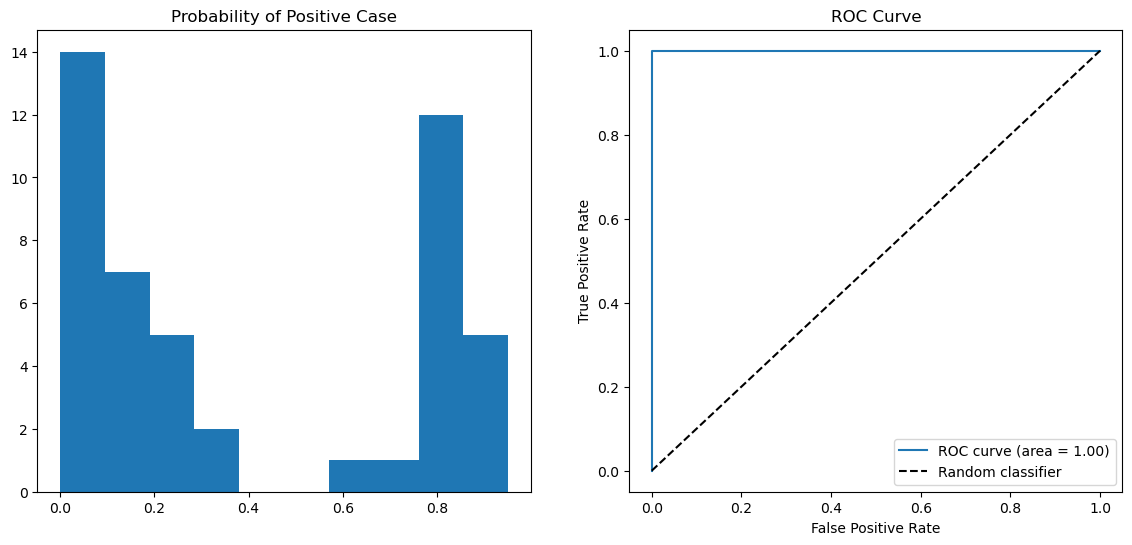

In [172]:
ref.roc(modelthermCP,X_trainCP,y_train)

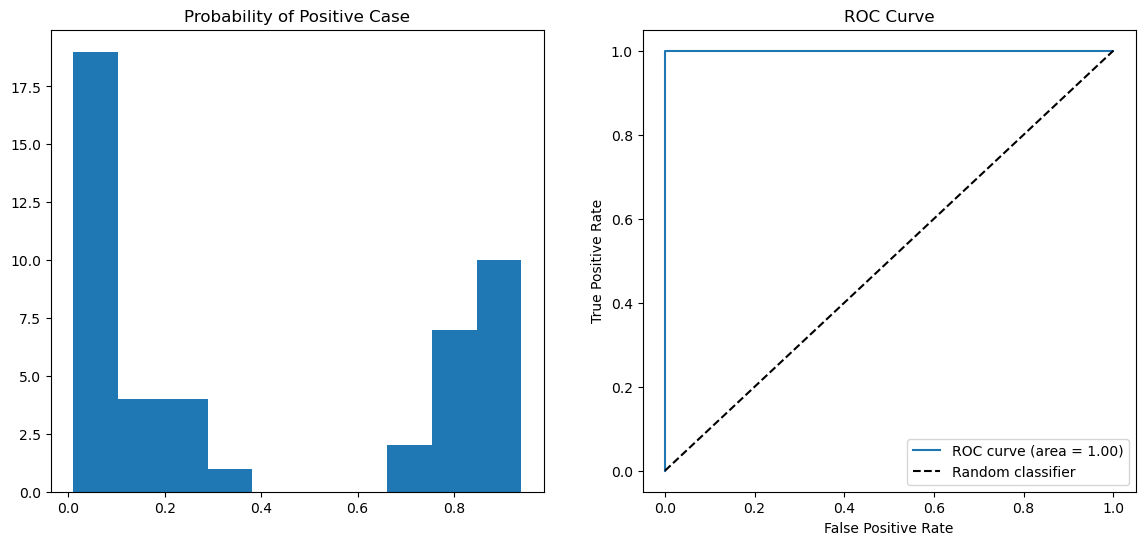

In [173]:
ref.roc(modeltherm,X_train,y_train)

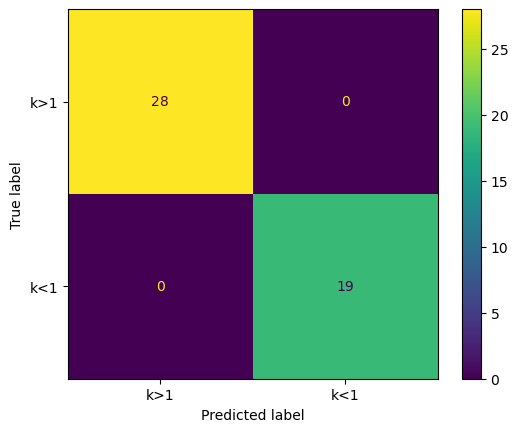

Accuracy:  1.0
Precision:  1.0
Recall:  1.0


In [174]:
ref.test_rf_modelbinary_boost(modelthermCPonly,X_trainCPonly,y_train,["k>1", "k<1"])

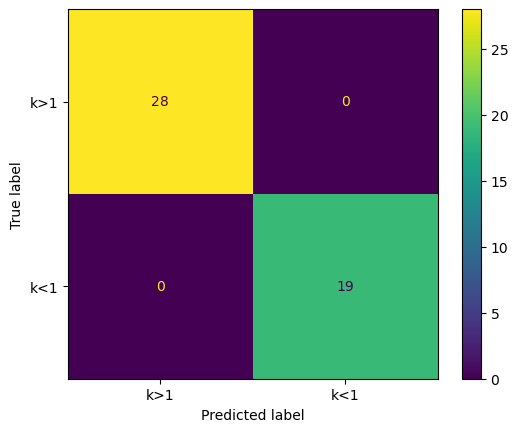

Accuracy:  1.0
Precision:  1.0
Recall:  1.0


In [175]:
ref.test_rf_modelbinary_boost(modelthermCP,X_trainCP,y_train,["k>1", "k<1"])

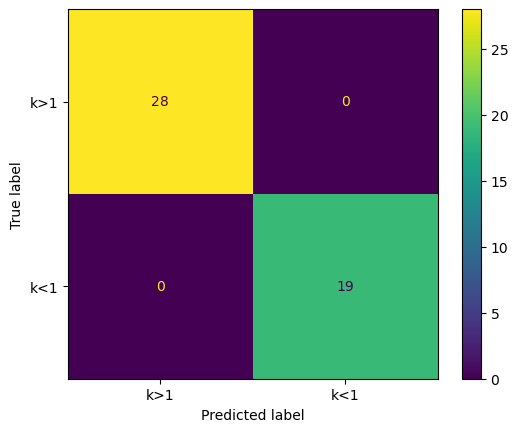

Accuracy:  1.0
Precision:  1.0
Recall:  1.0


In [176]:
ref.test_rf_modelbinary_boost(modeltherm,X_train,y_train,["k>1", "k<1"])

In [67]:
ref.feature_importance(X_trainCP,modelthermCP,n_features=15,title=' of CP model')


---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
Cell In[67], line 1
----> 1 ref.feature_importance(X_trainCP,modelthermCP,n_features=15,title=' of CP model')

NameError: name 'modelthermCP' is not defined


In [68]:
ref.feature_importance(X_train,modeltherm,n_features=15,title=' of simple model')


---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
Cell In[68], line 1
----> 1 ref.feature_importance(X_train,modeltherm,n_features=15,title=' of simple model')

NameError: name 'modeltherm' is not defined


In [69]:
ref.feature_importance(X_trainCPonly,modelthermCPonly,n_features=15,title=' of CP only model')


---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
Cell In[69], line 1
----> 1 ref.feature_importance(X_trainCPonly,modelthermCPonly,n_features=15,title=' of CP only model')

NameError: name 'modelthermCPonly' is not defined


In [44]:
k_train,ky_train,k_test,ky_test=ref.split(ThermData2,ThermData2.loc[:,'thermal_conductivity(W/mK)'],split_fraction=0.7)

Training data size: 47
Test data size: 20


In [45]:
print(np.mean(ky_train))
print(np.mean(ky_test))


3.024893617021277
2.981


In [46]:
kX_train=k_train.iloc[:,Comp]
kX_trainCP=k_train.iloc[:,CPandComp]
kX_test=k_test.iloc[:,Comp]
kX_testCP=k_test.iloc[:,CPandComp]
kX_trainCPonly=k_train.iloc[:,CPonly]
kX_testCPonly=k_test.iloc[:,CPonly]

In [ ]:
kpred={}
kpred['rtrain']=X_train
kpred['rtrainCP']=X_trainCP
kpred['rtrainCPO']=X_trainCPonly
kpred['rtest']=X_test
kpred['testCP']=X_testCP
kpred['testCPO']=X_testCPonly
kpred['ytrain']=y_train
kpred['ytest']=y_test

In [60]:
for j in ['','CP','CPO']:
    kpred['Rrfcmodel'+j]=RandomForestRegressor(max_features=0.6).fit(kpred['train'+j],kpred['ytrain'])
    kpred['Rdtcmodel'+j]=DecisionTreeRegressor().fit(kpred['train'+j],kpred['ytrain'])
    kpred['Rhgbcmodel'+j]=HistGradientBoostingRegressor().fit(kpred['train'+j],kpred['ytrain'])
    kpred['Rgbcmodel'+j]=GradientBoostingRegressor(max_features=0.6).fit(kpred['train'+j],kpred['ytrain'])

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
Cell In[60], line 3
      1 for j in ['','CP','CPO']:
      2     kpred['Rrfcmodel'+j]=RandomForestRegressor(max_features=0.6).fit(kpred['train'+j],kpred['ytrain'])
----> 3     kpred['Rdtcmodel'+j]=DecisionTreeRegressor().fit(kpred['train'+j],kpred['ytrain'])
      4     kpred['Rhgbcmodel'+j]=HistGradientBoostingRegressor().fit(kpred['train'+j],kpred['ytrain'])
      5     kpred['Rgbcmodel'+j]=GradientBoostingRegressor(max_features=0.6).fit(kpred['train'+j],kpred['ytrain'])

NameError: name 'DecisionTreeRegressor' is not defined


In [54]:
GkmodelthermCP=GradientBoostingRegressor().fit(kX_trainCP,ky_train)
Gkmodeltherm=GradientBoostingRegressor().fit(kX_train,ky_train)
GkmodelthermCPonly=GradientBoostingRegressor().fit(kX_trainCPonly,ky_train)  

Cross validation r2_score 0.1822
Cross validation mean_absolute_error 2.0286
Cross validation mean_squared_error 7.8366


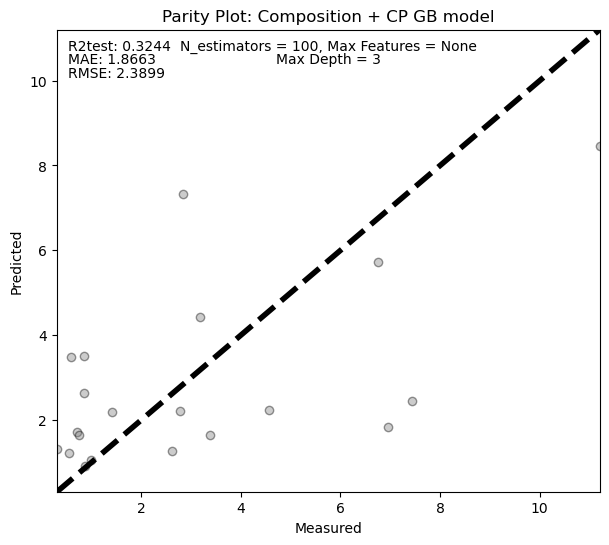

In [61]:
ref.test_rf_model(kX_trainCP,ky_train,kX_testCP,ky_test,GkmodelthermCP,title=': Composition + CP GB model')

In [47]:
kmodelthermCP=RandomForestRegressor().fit(kX_trainCP,ky_train)
kmodeltherm=RandomForestRegressor().fit(kX_train,ky_train)
kmodelthermCPonly=RandomForestRegressor().fit(kX_trainCPonly,ky_train)  

Cross validation r2_score 0.3781
Cross validation mean_absolute_error 1.8097
Cross validation mean_squared_error 5.9596


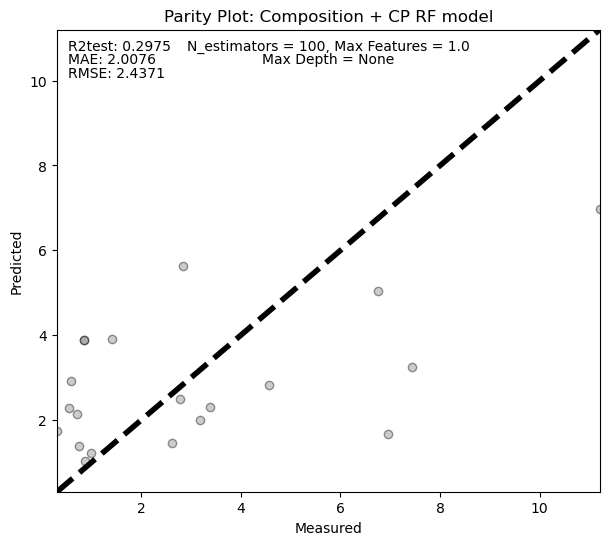

In [64]:
ref.test_rf_model(kX_trainCP,ky_train,kX_testCP,ky_test,kmodelthermCP,title=': Composition + CP RF model')

Cross validation r2_score 0.4022
Cross validation mean_absolute_error 1.777
Cross validation mean_squared_error 5.7284


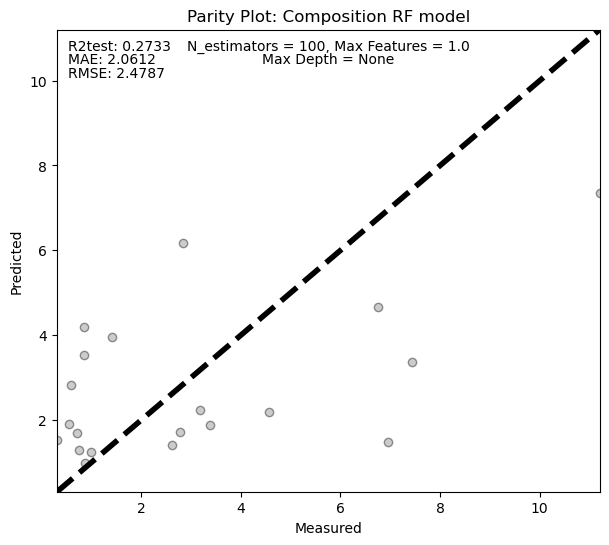

In [65]:
ref.test_rf_model(kX_train,ky_train,kX_test,ky_test,kmodeltherm,title=': Composition RF model')

Cross validation r2_score -0.2915
Cross validation mean_absolute_error 2.6998
Cross validation mean_squared_error 12.3761


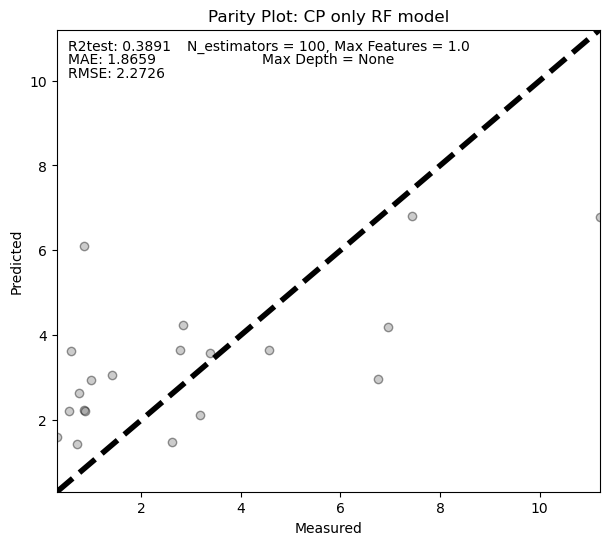

In [66]:
ref.test_rf_model(kX_trainCPonly,ky_train,kX_testCPonly,ky_test,kmodelthermCPonly,title=': CP only RF model')

Cross validation r2_score 0.286
Cross validation mean_absolute_error 1.9145
Cross validation mean_squared_error 6.842


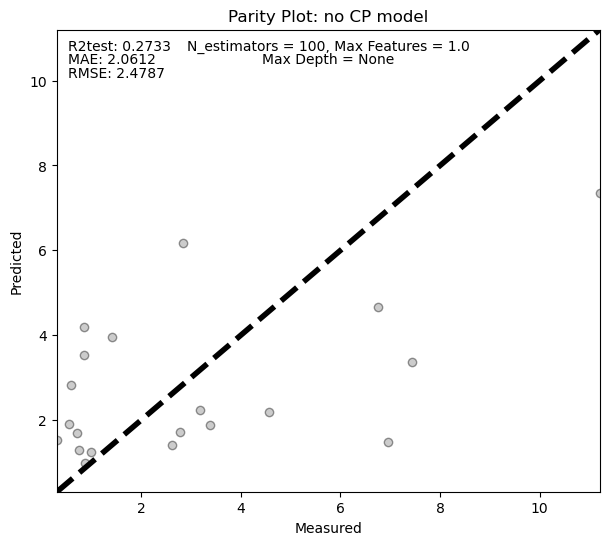

In [59]:
ref.test_rf_model(kX_train,ky_train,kX_test,ky_test,kmodeltherm,title=': no CP model')

Cross validation r2_score -0.198
Cross validation mean_absolute_error 2.4735
Cross validation mean_squared_error 11.7236


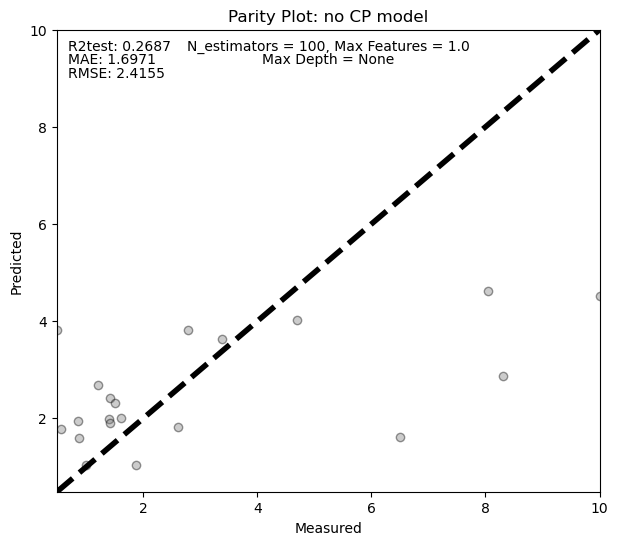

In [186]:
ref.test_rf_model(kX_trainCPonly,ky_train,kX_testCPonly,ky_test,kmodelthermCPonly,title=': no CP model')

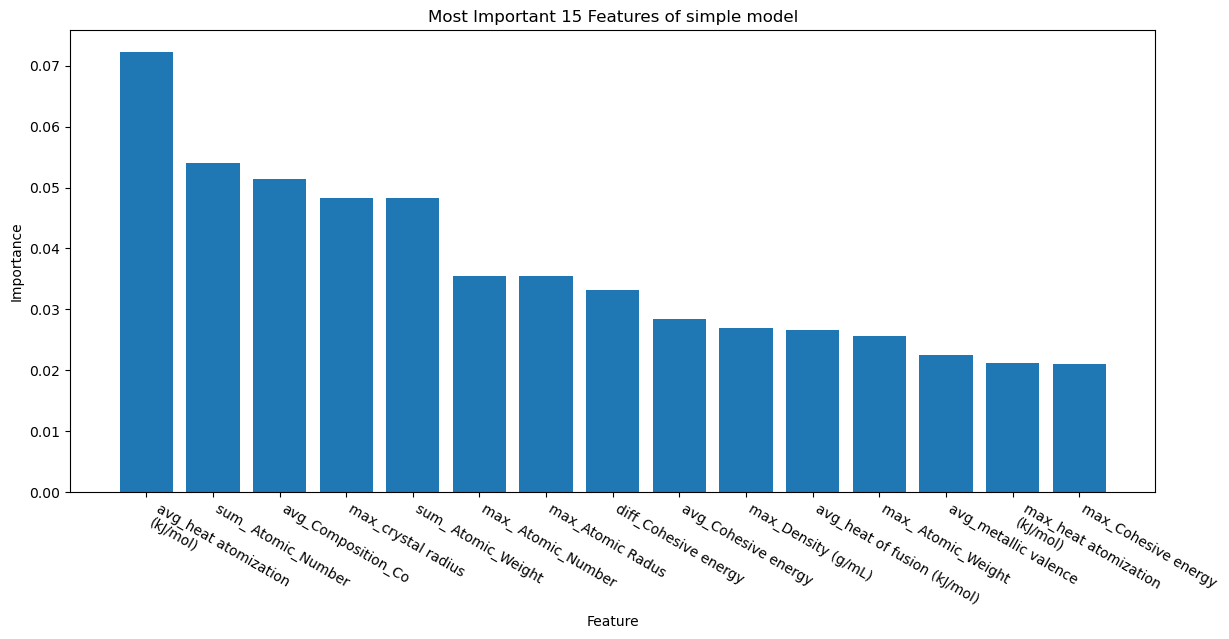

In [188]:
ref.feature_importance(kX_train,kmodeltherm,n_features=15,title=' of simple model')

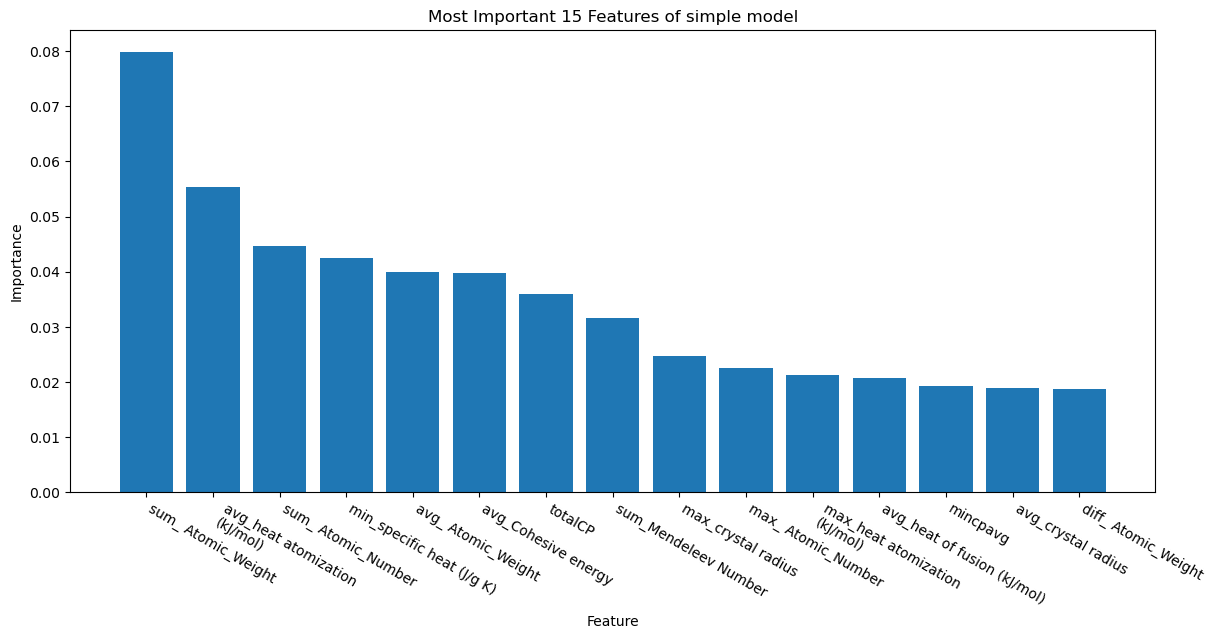

In [189]:
ref.feature_importance(kX_trainCP,kmodelthermCP,n_features=15,title=' of simple model')

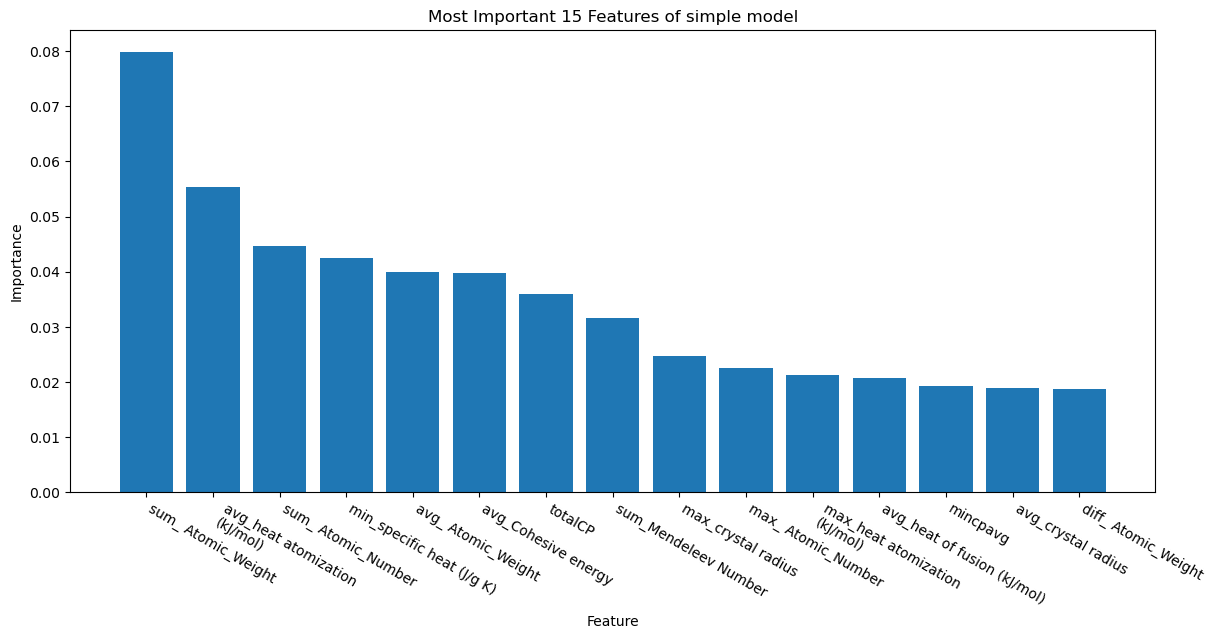

In [190]:
ref.feature_importance(kX_trainCP,kmodelthermCP,n_features=15,title=' of simple model')